<div style="display: flex; background-color: RGB(199,180,127);" >
<h1 style="margin: auto; padding: 30px; ">PRODUISEZ UNE ETUDE DE MARCHE AVEC PYTHON - P2</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Le but de ce notebook est de réaliser une analyse de groupements de pays à cibler afin d'exporter des poulets de l'entité "La poule qui chante",une entreprise française d’agroalimentaire qui souhaite exporter ses produits à l'international. 

Dans un second temps, pour émettre des recommandations stratégiques à partir de ces analyses, seront réalisés une ACP et un clustering. 

<div style="background-color: RGB(135,171,175);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyses </h2>
</div>

 # 4.1 Importation des librairies

In [1]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import warnings
import os

import plotly.graph_objects as go
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
df_data = pd.read_csv('data_final_final.csv')

#data.set_index('pays')
df_data = df_data.drop(['Unnamed: 0'], axis = 1)

df_data

Pays    Population  PIB/habitant en USD  \
0                               Inde  1.338677e+09              1937.92   
1              États-Unis d'Amérique  3.250848e+08             59468.23   
2                          Indonésie  2.646510e+08              3839.79   
3                           Pakistan  2.079062e+08              1558.08   
4                             Brésil  2.078338e+08              9896.72   
..                               ...           ...                  ...   
152                          Grenade  1.108740e+05              9309.27   
153  Saint-Vincent-et-les Grenadines  1.098270e+05              7996.65   
154               Antigua-et-Barbuda  9.542600e+04             16110.31   
155                        Dominique  7.145800e+04              7395.99   
156             Saint-Kitts-et-Nevis  5.204500e+04             22160.60   

     Indicateur Stabilité Politique  \
0                             -0.77   
1                              0.26   
2                             -0.50   
3                             -2.40   
4                             -0.48   
..                              ...   
152                            0.99   
153                            0.87   
154                            0.73   
155                            1.17   
156                            0.63   

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                 0.75          
1                                                19.93          
2                                                 2.42          
3                                                 1.97          
4                                                15.68          
..                                                 ...          
152                                              15.50          
153                                              25.10          
154                                              17.77          
155                                              11.52          
156                                              19.22          

     Exportations - Quantité  Importations - Quantité  Nourriture  Production  
0                       4.00                      0.0      2965.0      3545.0  
1                    3692.00                    123.0     18100.0     21914.0  
2                       0.00                      1.0      1904.0      2301.0  
3                       4.00                      2.0      1218.0      1281.0  
4                    4223.00                      3.0      9982.0     14201.0  
..                       ...                      ...         ...         ...  
152                   -45.70                      7.0         5.0         1.0  
153                   -70.31                      9.0         8.0         0.0  
154                     0.00                      7.0         5.0         0.0  
155                     0.00                      4.0         3.0         0.0  
156                     0.00                      4.0         3.0         0.0  

[157 rows x 9 columns]

In [4]:
# D'après nos analyses précédentes, il faut enlever les outliers afin de ne pas influencer considérablement nos futures analyses
df_data.drop(df_data[(df_data["Pays"] == "États-Unis d'Amérique")].index, inplace=True)
df_data.drop(df_data[(df_data["Pays"] == "Inde")].index, inplace=True)
df_data.drop(df_data[(df_data["Pays"] == "Brésil")].index, inplace=True)
df_data.drop(df_data[(df_data["Pays"] == "Chine")].index, inplace=True)

# Vérification avec un shape, qui est censé passer à 154 lignes
df_data.shape

(154, 9)

In [5]:
df_data.set_index("Pays", inplace=True)
display(df_data)

Population  PIB/habitant en USD  \
Pays                                                                
Indonésie                        264650963.0              3839.79   
Pakistan                         207906209.0              1558.08   
Nigéria                          190873244.0              1941.87   
Bangladesh                       159685424.0              1785.84   
Fédération de Russie             145530082.0             10822.77   
...                                      ...                  ...   
Grenade                             110874.0              9309.27   
Saint-Vincent-et-les Grenadines     109827.0              7996.65   
Antigua-et-Barbuda                   95426.0             16110.31   
Dominique                            71458.0              7395.99   
Saint-Kitts-et-Nevis                 52045.0             22160.60   

                                 Indicateur Stabilité Politique  \
Pays                                                              
Indonésie                                                 -0.50   
Pakistan                                                  -2.40   
Nigéria                                                   -2.00   
Bangladesh                                                -1.25   
Fédération de Russie                                      -0.64   
...                                                         ...   
Grenade                                                    0.99   
Saint-Vincent-et-les Grenadines                            0.87   
Antigua-et-Barbuda                                         0.73   
Dominique                                                  1.17   
Saint-Kitts-et-Nevis                                       0.63   

                                 Disponibilité de protéines en quantité (g/personne/jour)  \
Pays                                                                                        
Indonésie                                                                     2.42          
Pakistan                                                                      1.97          
Nigéria                                                                       0.31          
Bangladesh                                                                    0.47          
Fédération de Russie                                                         10.44          
...                                                                            ...          
Grenade                                                                      15.50          
Saint-Vincent-et-les Grenadines                                              25.10          
Antigua-et-Barbuda                                                           17.77          
Dominique                                                                    11.52          
Saint-Kitts-et-Nevis                                                         19.22          

                                 Exportations - Quantité  \
Pays                                                       
Indonésie                                           0.00   
Pakistan                                            4.00   
Nigéria                                             0.00   
Bangladesh                                         -2.50   
Fédération de Russie                              115.00   
...                                                  ...   
Grenade                                           -45.70   
Saint-Vincent-et-les Grenadines                   -70.31   
Antigua-et-Barbuda                                  0.00   
Dominique                                           0.00   
Saint-Kitts-et-Nevis                                0.00   

                                 Importations - Quantité  Nourriture  \
Pays                                                                   
Indonésie                                            1.0      1904.0   
Pakistan                                             2.0 

In [6]:
#Dimensions du Dataframe
df_data.shape

(154, 8)

In [7]:
# Informations du Dataframe
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, Indonésie to Saint-Kitts-et-Nevis
Data columns (total 8 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Population                                                154 non-null    float64
 1   PIB/habitant en USD                                       154 non-null    float64
 2   Indicateur Stabilité Politique                            154 non-null    float64
 3   Disponibilité de protéines en quantité (g/personne/jour)  154 non-null    float64
 4   Exportations - Quantité                                   154 non-null    float64
 5   Importations - Quantité                                   154 non-null    float64
 6   Nourriture                                                154 non-null    float64
 7   Production                                                154 non-null    float64
dtypes

In [8]:
# Statistiques du Dataframe
df_data.describe()

Population  PIB/habitant en USD  Indicateur Stabilité Politique  \
count  1.540000e+02           154.000000                      154.000000   
mean   2.542351e+07         14064.057013                       -0.065065   
std    4.110029e+07         19510.720836                        0.908990   
min    5.204500e+04           464.290000                       -2.930000   
25%    2.893339e+06          1923.255000                       -0.637500   
50%    9.608513e+06          5871.740000                        0.025000   
75%    2.933223e+07         17299.275000                        0.670000   
max    2.646510e+08        110203.010000                        1.560000   

       Disponibilité de protéines en quantité (g/personne/jour)  \
count                                         154.000000          
mean                                            7.116883          
std                                             5.537879          
min                                             0.040000          
25%                                             2.292500          
50%                                             6.505000          
75%                                            10.057500          
max                                            27.870000          

       Exportations - Quantité  Importations - Quantité   Nourriture  \
count               154.000000               154.000000   154.000000   
mean                 50.076234                87.331169   397.188312   
std                 152.419709               187.179165   707.745521   
min                 -70.310000                 0.000000     2.000000   
25%                   0.000000                 3.000000    30.250000   
50%                   1.000000                16.500000    99.500000   
75%                  16.352500                78.750000   328.500000   
max                1025.000000              1069.000000  4509.000000   

        Production  
count   154.000000  
mean    393.422078  
std     717.139596  
min       0.000000  
25%      13.250000  
50%      70.000000  
75%     323.000000  
max    4444.000000

# 4.2 Data Split

In [9]:
cols = ["Population","PIB/habitant en USD","Indicateur Stabilité Politique","Nourriture","Disponibilité de protéines en quantité (g/personne/jour)","Exportations - Quantité","Importations - Quantité","Production"]

In [10]:
df = df_data[cols]
df.head()

Population  PIB/habitant en USD  \
Pays                                                     
Indonésie             264650963.0              3839.79   
Pakistan              207906209.0              1558.08   
Nigéria               190873244.0              1941.87   
Bangladesh            159685424.0              1785.84   
Fédération de Russie  145530082.0             10822.77   

                      Indicateur Stabilité Politique  Nourriture  \
Pays                                                               
Indonésie                                      -0.50      1904.0   
Pakistan                                       -2.40      1218.0   
Nigéria                                        -2.00       192.0   
Bangladesh                                     -1.25       240.0   
Fédération de Russie                           -0.64      4509.0   

                      Disponibilité de protéines en quantité (g/personne/jour)  \
Pays                                                                             
Indonésie                                                          2.42          
Pakistan                                                           1.97          
Nigéria                                                            0.31          
Bangladesh                                                         0.47          
Fédération de Russie                                              10.44          

                      Exportations - Quantité  Importations - Quantité  \
Pays                                                                     
Indonésie                                 0.0                      1.0   
Pakistan                                  4.0                      2.0   
Nigéria                                   0.0                      0.0   
Bangladesh                               -2.5                      0.0   
Fédération de Russie                    115.0                    226.0   

                      Production  
Pays                              
Indonésie                 2301.0  
Pakistan                  1281.0  
Nigéria                    201.0  
Bangladesh                 249.0  
Fédération de Russie      4444.0

Nous allons ensuite séparer nos données. D'un coté `X` la matrice des données :

In [11]:
X = df.values
X[:155]

array([[ 2.64650963e+08,  3.83979000e+03, -5.00000000e-01, ...,
         0.00000000e+00,  1.00000000e+00,  2.30100000e+03],
       [ 2.07906209e+08,  1.55808000e+03, -2.40000000e+00, ...,
         4.00000000e+00,  2.00000000e+00,  1.28100000e+03],
       [ 1.90873244e+08,  1.94187000e+03, -2.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  2.01000000e+02],
       ...,
       [ 9.54260000e+04,  1.61103100e+04,  7.30000000e-01, ...,
         0.00000000e+00,  7.00000000e+00,  0.00000000e+00],
       [ 7.14580000e+04,  7.39599000e+03,  1.17000000e+00, ...,
         0.00000000e+00,  4.00000000e+00,  0.00000000e+00],
       [ 5.20450000e+04,  2.21606000e+04,  6.30000000e-01, ...,
         0.00000000e+00,  4.00000000e+00,  0.00000000e+00]])

La forme de cette matrice est conforme à nos attentes :

In [12]:
X.shape

(154, 8)

Nous enregistrons les noms de pays dans une variable names :

In [13]:
names = df.index
names

Index(['Indonésie', 'Pakistan', 'Nigéria', 'Bangladesh',
       'Fédération de Russie', 'Japon', 'Mexique', 'Éthiopie', 'Philippines',
       'Égypte',
       ...
       'Vanuatu', 'Sao Tomé-et-Principe', 'Samoa', 'Sainte-Lucie', 'Kiribati',
       'Grenade', 'Saint-Vincent-et-les Grenadines', 'Antigua-et-Barbuda',
       'Dominique', 'Saint-Kitts-et-Nevis'],
      dtype='object', name='Pays', length=154)

et nos colonnes, nos features, dans une variable `features` :

In [14]:
features = df.columns
features

Index(['Population', 'PIB/habitant en USD', 'Indicateur Stabilité Politique',
       'Nourriture',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Exportations - Quantité', 'Importations - Quantité', 'Production'],
      dtype='object')

# 4.3 ACP

## Scaling

Commençons par scaler les données. On instancie :

In [15]:
scaler = StandardScaler()

On fit :

In [16]:
scaler.fit(X)

StandardScaler()

On transforme :

In [17]:
X_scaled = scaler.transform(X)
X_scaled[:155]

array([[ 5.83956824, -0.52574302, -0.48004273, ..., -0.32961364,
        -0.46272691,  2.6686599 ],
       [ 4.45442263, -0.64307105, -2.57709413, ..., -0.30328469,
        -0.45736701,  1.24170215],
       [ 4.0386461 , -0.62333614, -2.13560962, ..., -0.32961364,
        -0.46808682, -0.26919429],
       ...,
       [-0.61826118,  0.10522057,  0.87752212, ..., -0.32961364,
        -0.43056748, -0.55038891],
       [-0.61884624, -0.34287931,  1.36315508, ..., -0.32961364,
        -0.4466472 , -0.55038891],
       [-0.61932012,  0.41633312,  0.767151  , ..., -0.32961364,
        -0.4466472 , -0.55038891]])

On espère avoir une moyenne à 0 et un écart type à 1 :

In [18]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7
mean  0.0  0.0  0.0  0.0 -0.0  0.0  0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

## PCA

Nous allons travailler sur les 8 composantes :

In [19]:
n_components = 8

On instancie notre ACP :

In [20]:
pca = PCA(n_components=n_components)

On l'entraine sur les données scalées :

In [21]:
pca.fit(X_scaled)

PCA(n_components=8)

## Explained variance & scree plot

Intéressons nous maintenant à la variance *captée* par chaque nouvelle composante. Grace à `scikit-learn` on peut utiliser l'attribut `explained_variance_ratio_` :

In [22]:
pca.explained_variance_ratio_

array([0.3913762 , 0.27598361, 0.09885552, 0.07751192, 0.07324903,
       0.04913686, 0.03311542, 0.00077145])

Enregistrons cela dans une variable :

In [23]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([39.14, 27.6 ,  9.89,  7.75,  7.32,  4.91,  3.31,  0.08])

In [24]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 39.,  67.,  77.,  84.,  92.,  97., 100., 100.])

Définisons ensuite une variable avec la liste de nos composantes :

In [25]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8]

On peut enfin l'afficher de façon graphique :

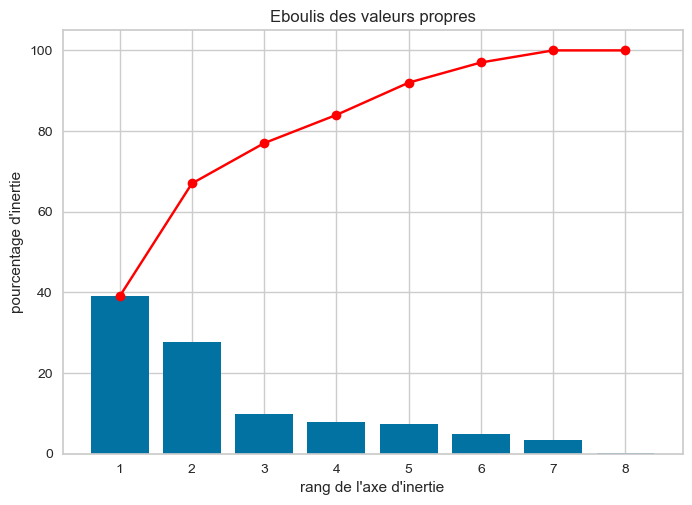

In [26]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que près de 77% de la variance est comprise dans les 3 premières composantes, et près de 90% dans les 4 premières.

## Components

In [27]:
pcs = pca.components_
pcs

array([[ 0.39787982,  0.10680837, -0.07273331,  0.53296823,  0.13982092,
         0.30453636,  0.3876386 ,  0.52761954],
       [-0.32527161,  0.51927804,  0.5720004 , -0.06028622,  0.48739396,
         0.16845743,  0.15532957, -0.06059506],
       [-0.17440332, -0.01599758, -0.11018703, -0.25464639, -0.36318989,
         0.84542525,  0.16486436, -0.13605365],
       [-0.28078148, -0.54940492, -0.09310694,  0.06687695,  0.56578989,
         0.29362785, -0.39345009,  0.21221708],
       [-0.30272757, -0.38408584, -0.15643668,  0.0125926 ,  0.18285589,
        -0.19774314,  0.77986559, -0.23552946],
       [ 0.14131236,  0.43067541, -0.72383321, -0.19073443,  0.42995494,
         0.04142908, -0.03073566, -0.21613206],
       [ 0.71712021, -0.28945165,  0.31192286, -0.34278887,  0.26935225,
         0.13094464,  0.08308419, -0.30092548],
       [-0.02758101,  0.00742352, -0.03181977, -0.69925011,  0.00489772,
        -0.14125621,  0.16609582,  0.6794526 ]])

In [28]:
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6  \
0  0.397880  0.106808 -0.072733  0.532968  0.139821  0.304536  0.387639   
1 -0.325272  0.519278  0.572000 -0.060286  0.487394  0.168457  0.155330   
2 -0.174403 -0.015998 -0.110187 -0.254646 -0.363190  0.845425  0.164864   
3 -0.280781 -0.549405 -0.093107  0.066877  0.565790  0.293628 -0.393450   
4 -0.302728 -0.384086 -0.156437  0.012593  0.182856 -0.197743  0.779866   
5  0.141312  0.430675 -0.723833 -0.190734  0.429955  0.041429 -0.030736   
6  0.717120 -0.289452  0.311923 -0.342789  0.269352  0.130945  0.083084   
7 -0.027581  0.007424 -0.031820 -0.699250  0.004898 -0.141256  0.166096   

          7  
0  0.527620  
1 -0.060595  
2 -0.136054  
3  0.212217  
4 -0.235529  
5 -0.216132  
6 -0.300925  
7  0.679453

In [29]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

Population  PIB/habitant en USD  Indicateur Stabilité Politique  \
F1        0.40                 0.11                           -0.07   
F2       -0.33                 0.52                            0.57   
F3       -0.17                -0.02                           -0.11   
F4       -0.28                -0.55                           -0.09   
F5       -0.30                -0.38                           -0.16   
F6        0.14                 0.43                           -0.72   
F7        0.72                -0.29                            0.31   
F8       -0.03                 0.01                           -0.03   

    Nourriture  Disponibilité de protéines en quantité (g/personne/jour)  \
F1        0.53                                               0.14          
F2       -0.06                                               0.49          
F3       -0.25                                              -0.36          
F4        0.07                                               0.57          
F5        0.01                                               0.18          
F6       -0.19                                               0.43          
F7       -0.34                                               0.27          
F8       -0.70                                               0.00          

    Exportations - Quantité  Importations - Quantité  Production  
F1                     0.30                     0.39        0.53  
F2                     0.17                     0.16       -0.06  
F3                     0.85                     0.16       -0.14  
F4                     0.29                    -0.39        0.21  
F5                    -0.20                     0.78       -0.24  
F6                     0.04                    -0.03       -0.22  
F7                     0.13                     0.08       -0.30  
F8                    -0.14                     0.17        0.68

In [30]:
pcs.T

F1        F2  \
Population                                          0.397880 -0.325272   
PIB/habitant en USD                                 0.106808  0.519278   
Indicateur Stabilité Politique                     -0.072733  0.572000   
Nourriture                                          0.532968 -0.060286   
Disponibilité de protéines en quantité (g/perso...  0.139821  0.487394   
Exportations - Quantité                             0.304536  0.168457   
Importations - Quantité                             0.387639  0.155330   
Production                                          0.527620 -0.060595   

                                                          F3        F4  \
Population                                         -0.174403 -0.280781   
PIB/habitant en USD                                -0.015998 -0.549405   
Indicateur Stabilité Politique                     -0.110187 -0.093107   
Nourriture                                         -0.254646  0.066877   
Disponibilité de protéines en quantité (g/perso... -0.363190  0.565790   
Exportations - Quantité                             0.845425  0.293628   
Importations - Quantité                             0.164864 -0.393450   
Production                                         -0.136054  0.212217   

                                                          F5        F6  \
Population                                         -0.302728  0.141312   
PIB/habitant en USD                                -0.384086  0.430675   
Indicateur Stabilité Politique                     -0.156437 -0.723833   
Nourriture                                          0.012593 -0.190734   
Disponibilité de protéines en quantité (g/perso...  0.182856  0.429955   
Exportations - Quantité                            -0.197743  0.041429   
Importations - Quantité                             0.779866 -0.030736   
Production                                         -0.235529 -0.216132   

                                                          F7        F8  
Population                                          0.717120 -0.027581  
PIB/habitant en USD                                -0.289452  0.007424  
Indicateur Stabilité Politique                      0.311923 -0.031820  
Nourriture                                         -0.342789 -0.699250  
Disponibilité de protéines en quantité (g/perso...  0.269352  0.004898  
Exportations - Quantité                             0.130945 -0.141256  
Importations - Quantité                             0.083084  0.166096  
Production                                         -0.300925  0.679453

<Axes: >

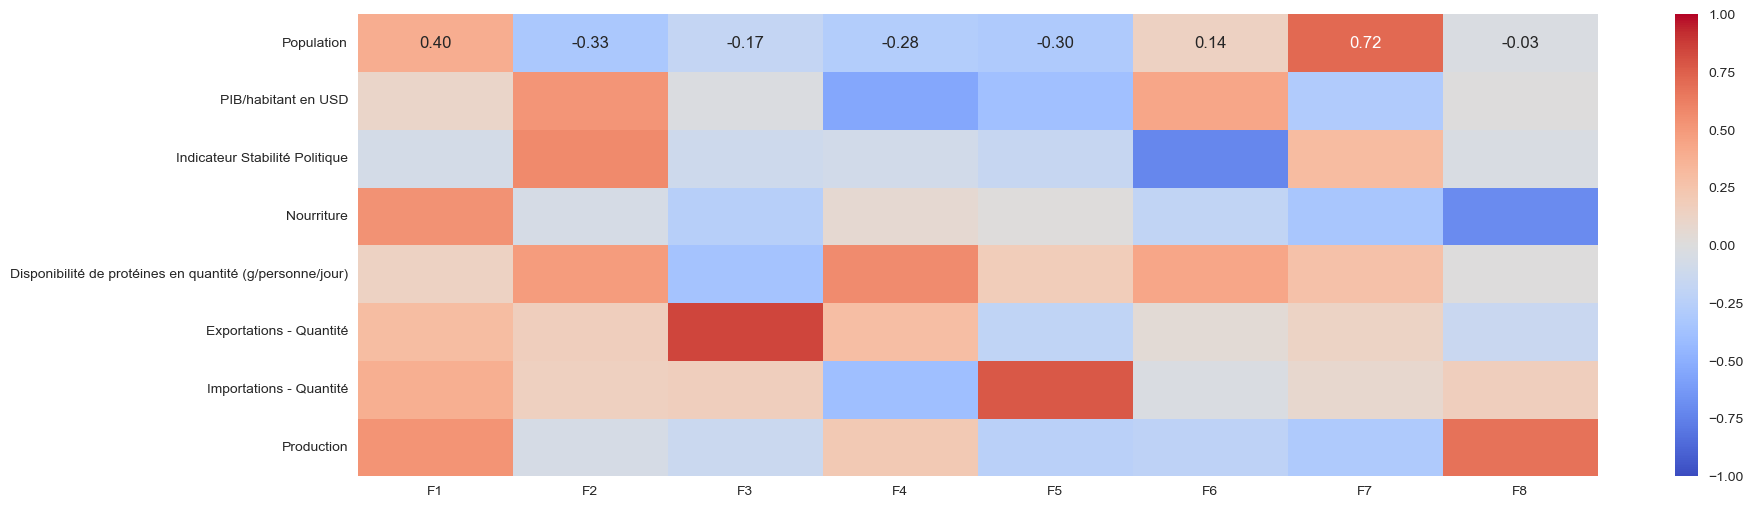

In [31]:
#Et pour une représentation plus *visuelle*, comme cela :
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

## Cercle de Correlation

Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes. Comme - en code - on commence à compter à partir de 0, cela nous donne :

Pour la partie graphique :

In [32]:
def correlation_graph(pca,
                      x_y,
                      features) :
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.07,
                head_length=0.07,
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [33]:
x_y = (0,1)

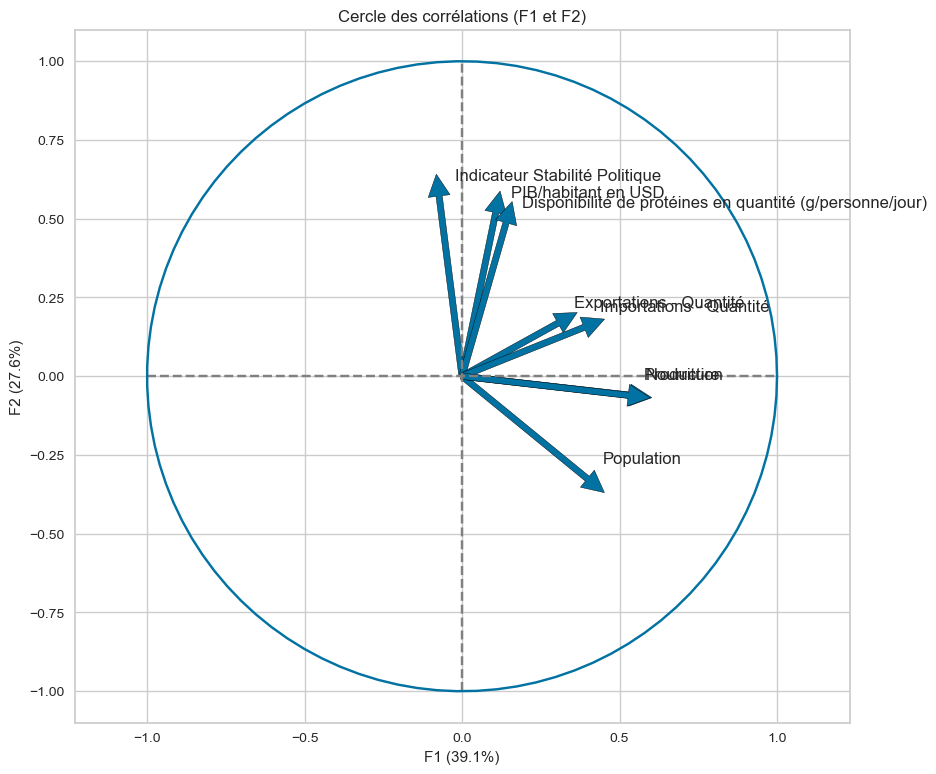

In [34]:
correlation_graph(pca, x_y, features)

In [35]:
x1_y1 = (1,2)

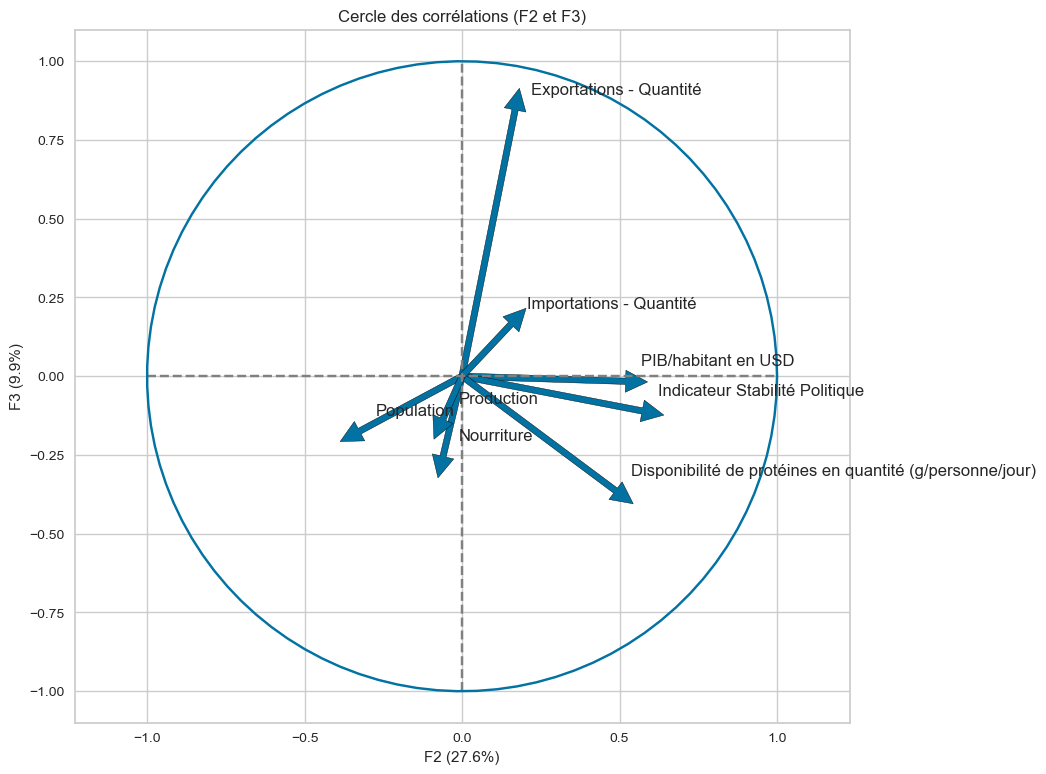

In [36]:
correlation_graph(pca, x1_y1, features)

In [37]:
x2_y2 = (0,2)

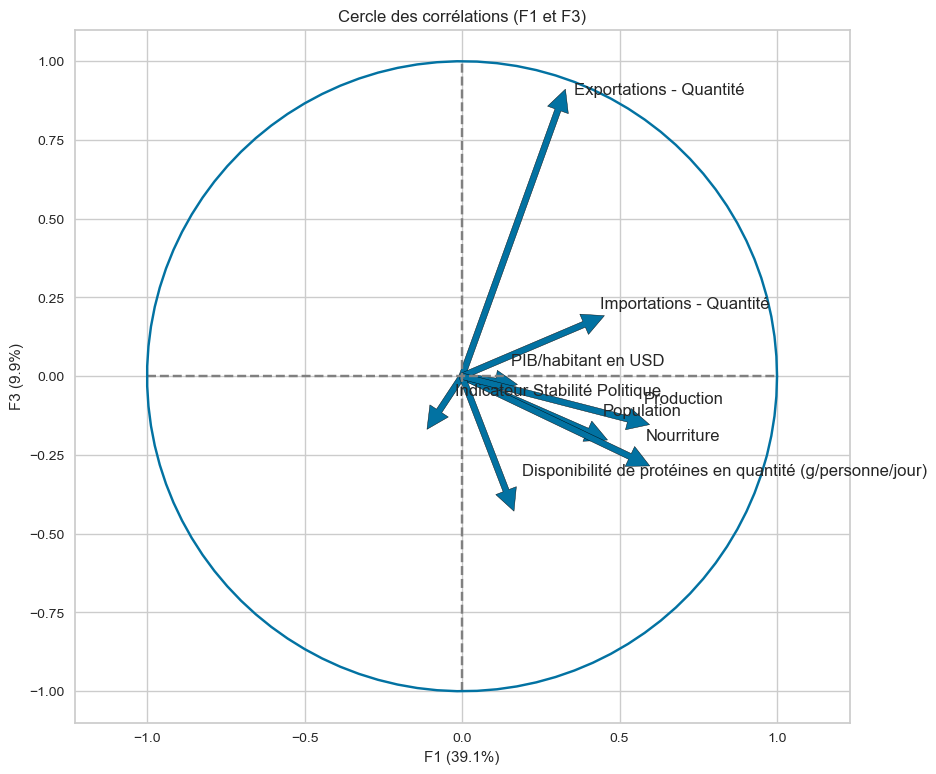

In [38]:
correlation_graph(pca, x2_y2, features)

## Projection

Travaillons maintenant sur la projection de nos dimensions. Tout d'abord calculons les coordonnées de nos individus dans le nouvel espace :

In [39]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 4.44992807, -3.27964163, -1.9100455 , -0.9930758 , -2.54370097,
        -0.40322185,  2.34405697,  0.13549232],
       [ 2.76632855, -3.97890833, -0.94100483, -0.7528036 , -1.4433478 ,
         1.32818825,  1.4752666 , -0.05324865],
       [ 0.94434527, -3.55433273, -0.25633579, -1.27957726, -1.11472337,
         1.43226762,  2.17698114, -0.06480763],
       [ 0.65111182, -2.8341933 , -0.26554783, -1.10811392, -1.01707645,
         0.70634377,  1.85368698, -0.06969595],
       [ 7.79364369, -1.61705287, -2.42878432,  1.09349048, -1.38030924,
        -1.28093723, -1.47061393, -0.22134962]])

In [40]:
x_y

(0, 1)

In [41]:
# Utiliser 4 composantes 

def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

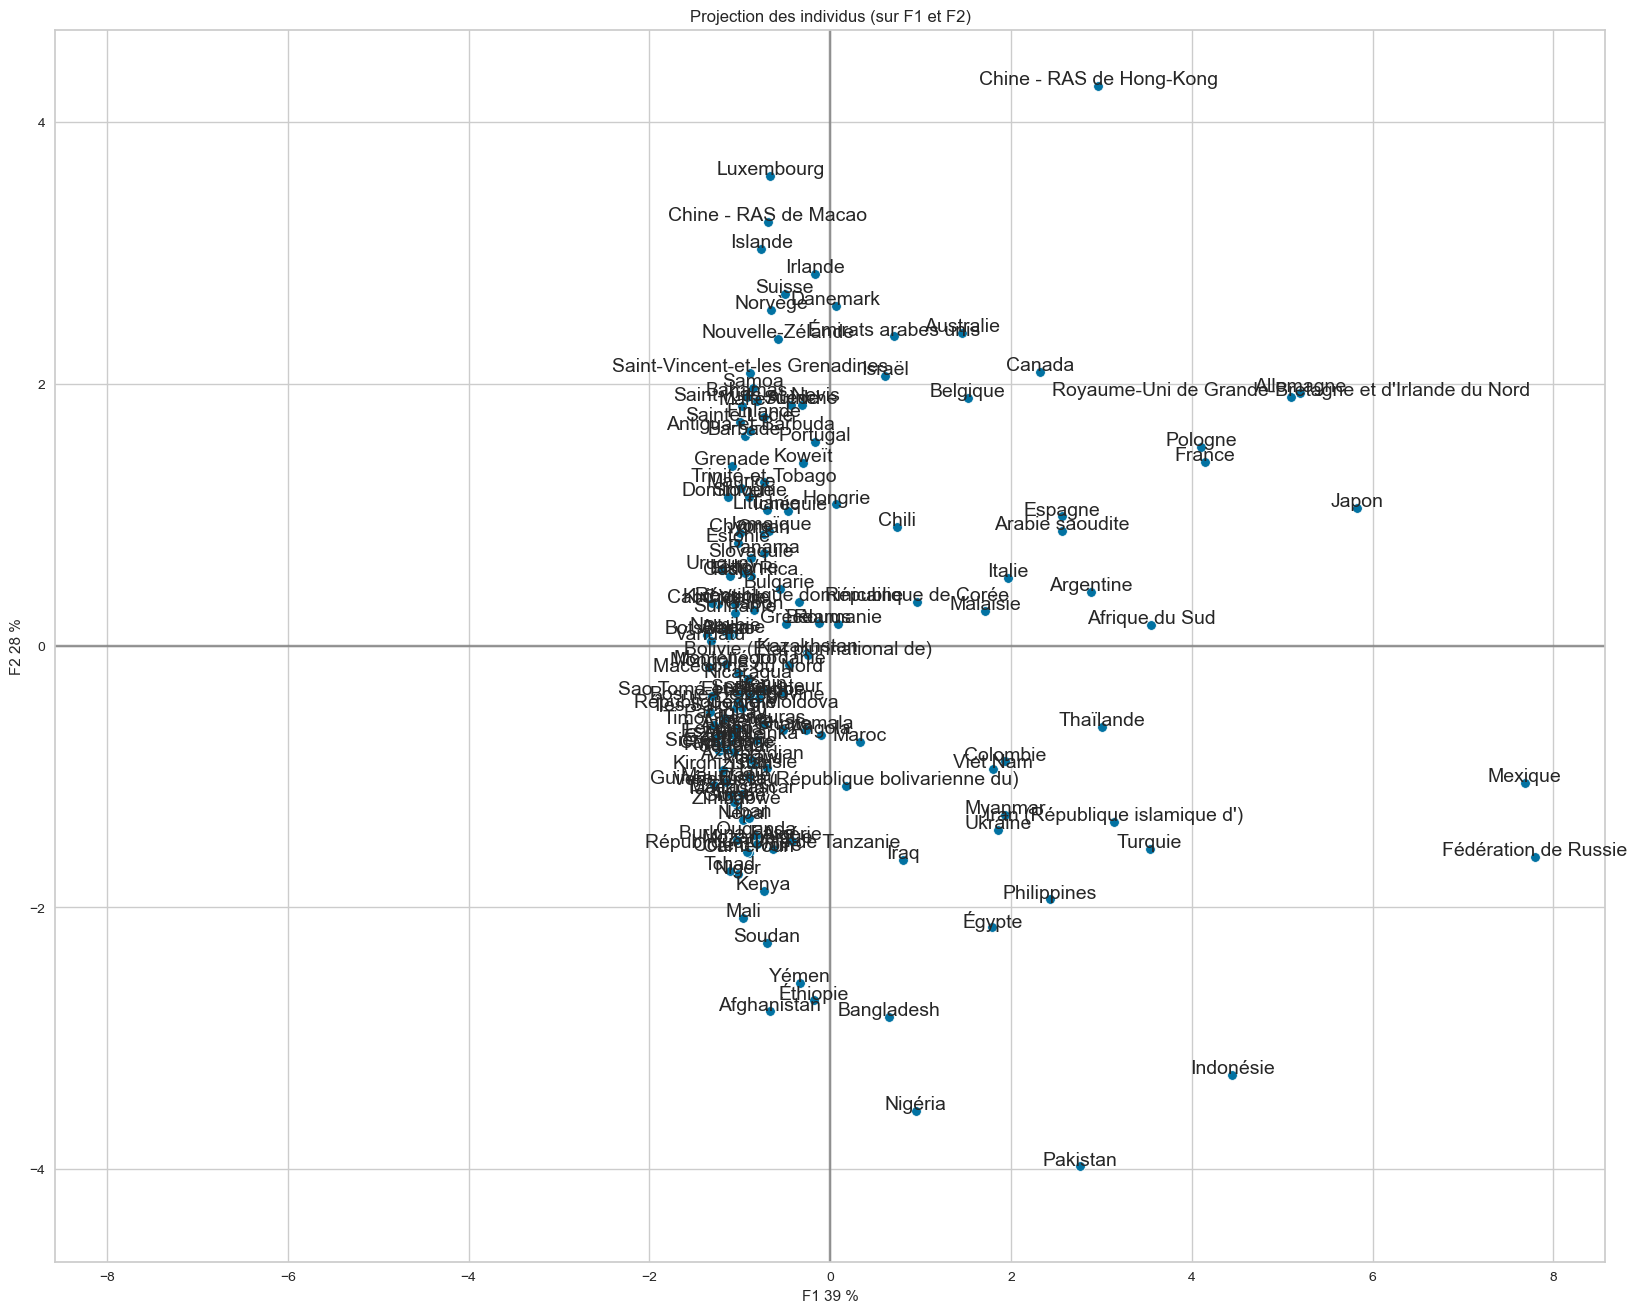

In [42]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

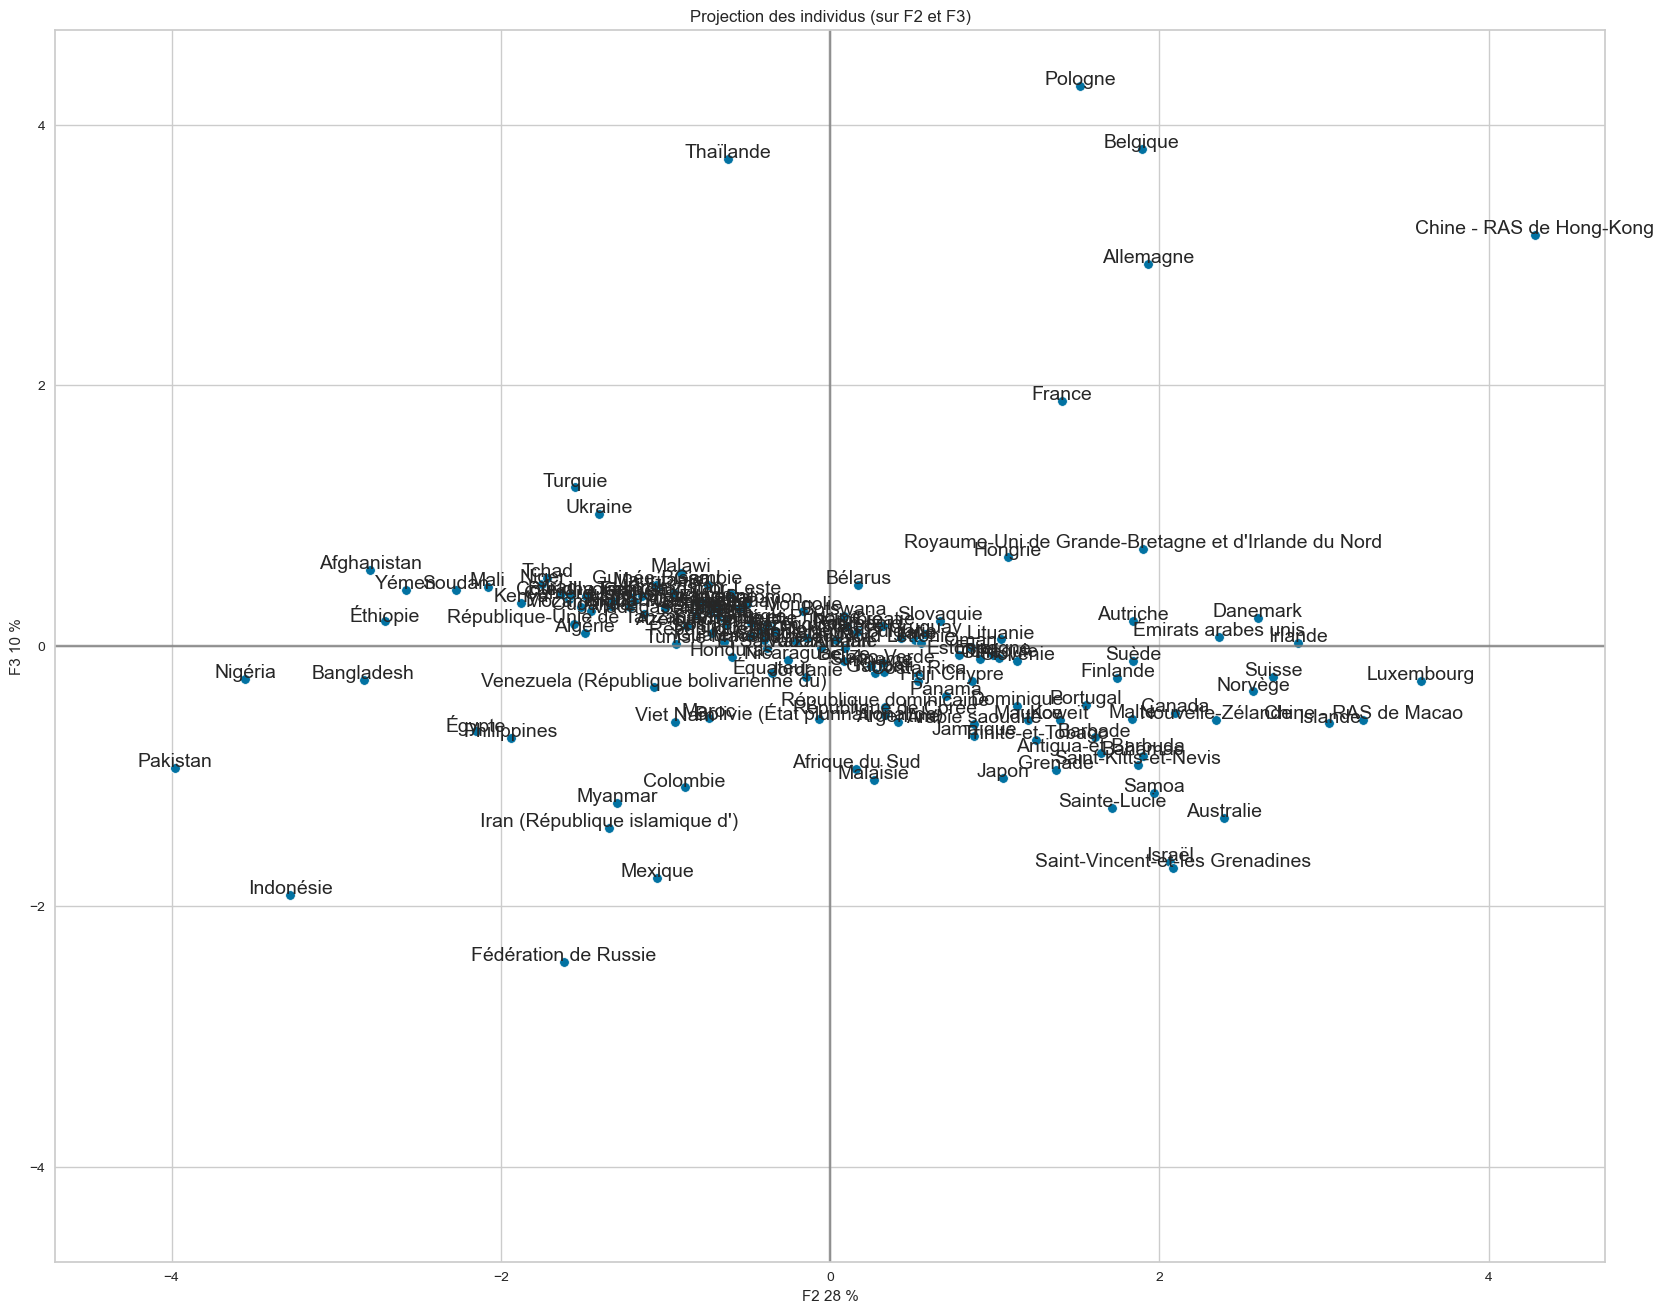

In [43]:
x_y = 1,2
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16),marker="o")

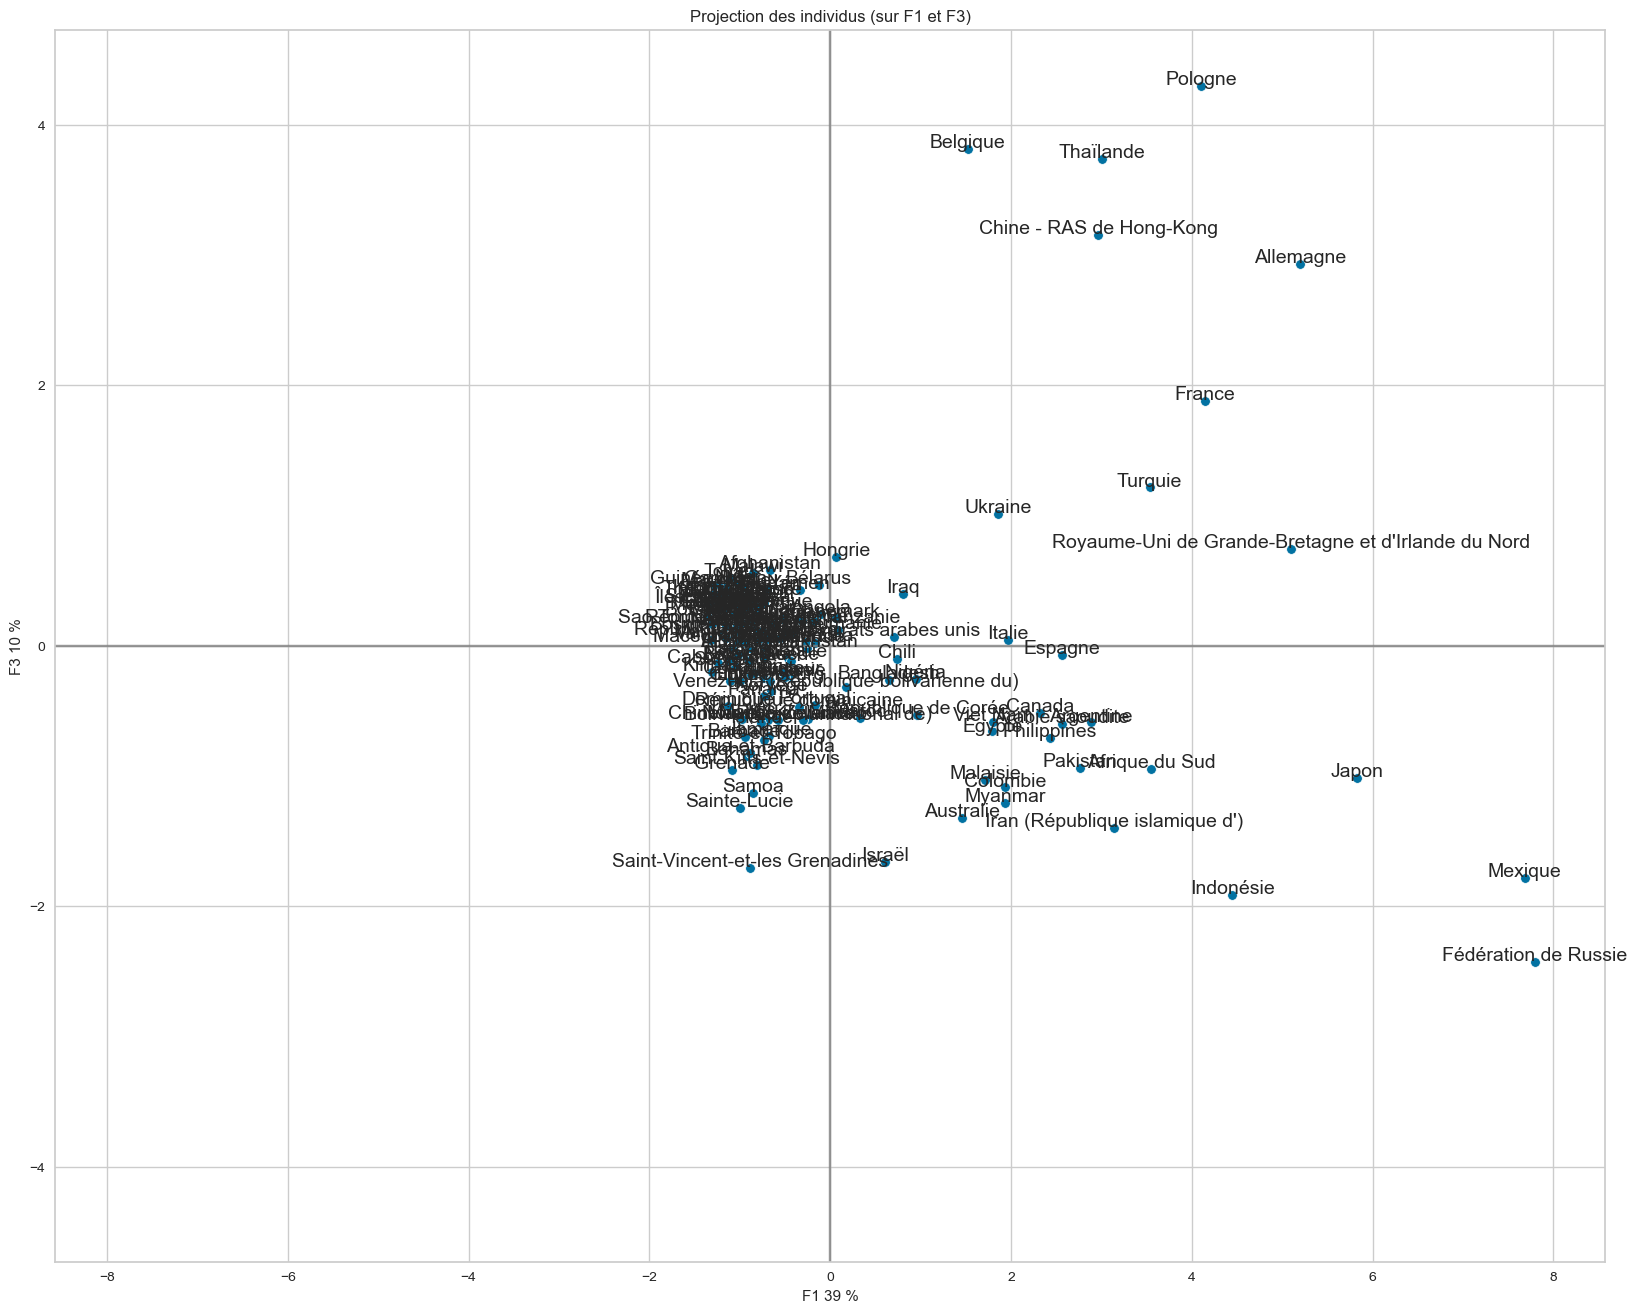

In [44]:
x_y = 0,2
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")

# 4.4 Clustering

## 4.4.1 Classification ascendante hiérarchique

In [45]:
# Linkage

Z = linkage(X_scaled, method="ward")
Z

array([[4.50000000e+01, 4.60000000e+01, 7.39990222e-02, 2.00000000e+00],
       [6.20000000e+01, 8.00000000e+01, 8.74719207e-02, 2.00000000e+00],
       [5.60000000e+01, 5.80000000e+01, 1.06579065e-01, 2.00000000e+00],
       [1.07000000e+02, 1.11000000e+02, 1.46062449e-01, 2.00000000e+00],
       [1.29000000e+02, 1.33000000e+02, 1.59162581e-01, 2.00000000e+00],
       [4.70000000e+01, 6.00000000e+01, 1.70397261e-01, 2.00000000e+00],
       [1.38000000e+02, 1.48000000e+02, 1.70397966e-01, 2.00000000e+00],
       [8.60000000e+01, 1.18000000e+02, 1.81544921e-01, 2.00000000e+00],
       [6.30000000e+01, 1.56000000e+02, 1.89912056e-01, 3.00000000e+00],
       [1.20000000e+02, 1.31000000e+02, 2.03655017e-01, 2.00000000e+00],
       [9.30000000e+01, 1.25000000e+02, 2.31448810e-01, 2.00000000e+00],
       [1.37000000e+02, 1.41000000e+02, 2.32585476e-01, 2.00000000e+00],
       [1.04000000e+02, 1.55000000e+02, 2.35393101e-01, 3.00000000e+00],
       [1.17000000e+02, 1.44000000e+02, 2.48456804e

## Dendrogram

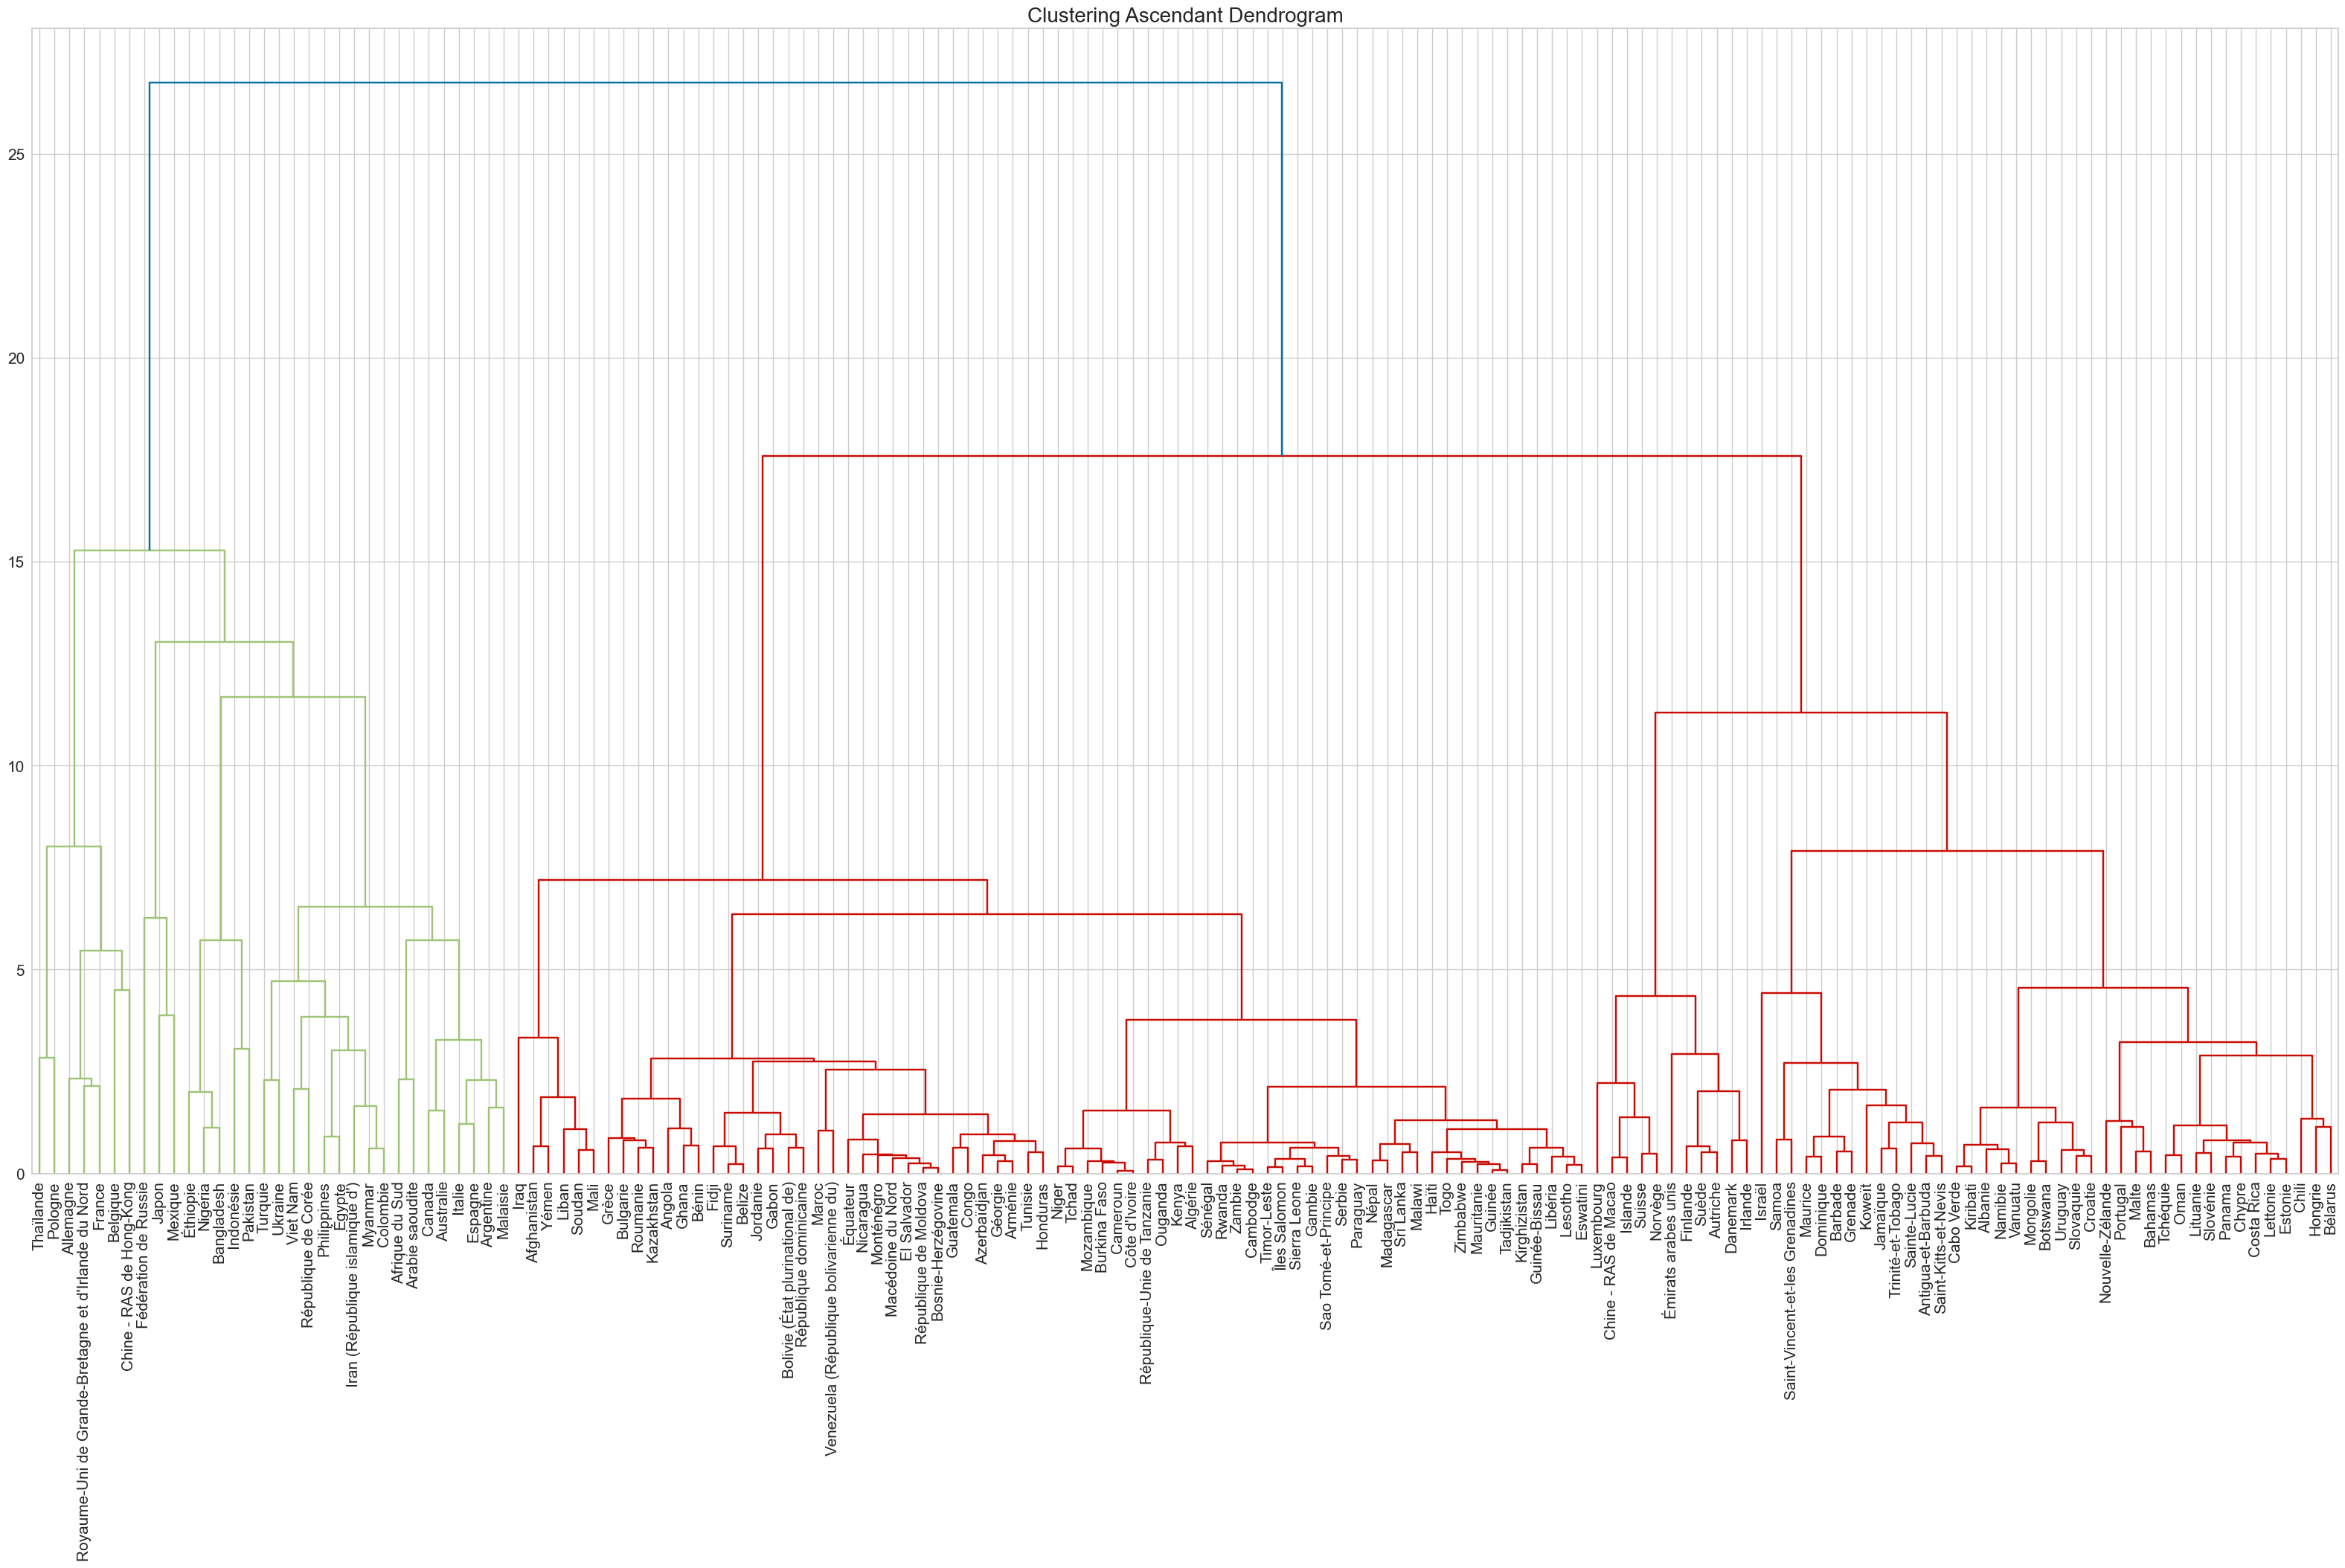

In [46]:
def plot_dendogram(Z, names):
    fig1, ax = plt.subplots(1, 1, figsize=(40, 20))

    _ = dendrogram(Z, ax=ax, labels=names, orientation = "top")

    plt.title("Clustering Ascendant Dendrogram", fontsize=20)
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15)
    plt.show()
    
plot_dendogram(Z, names)

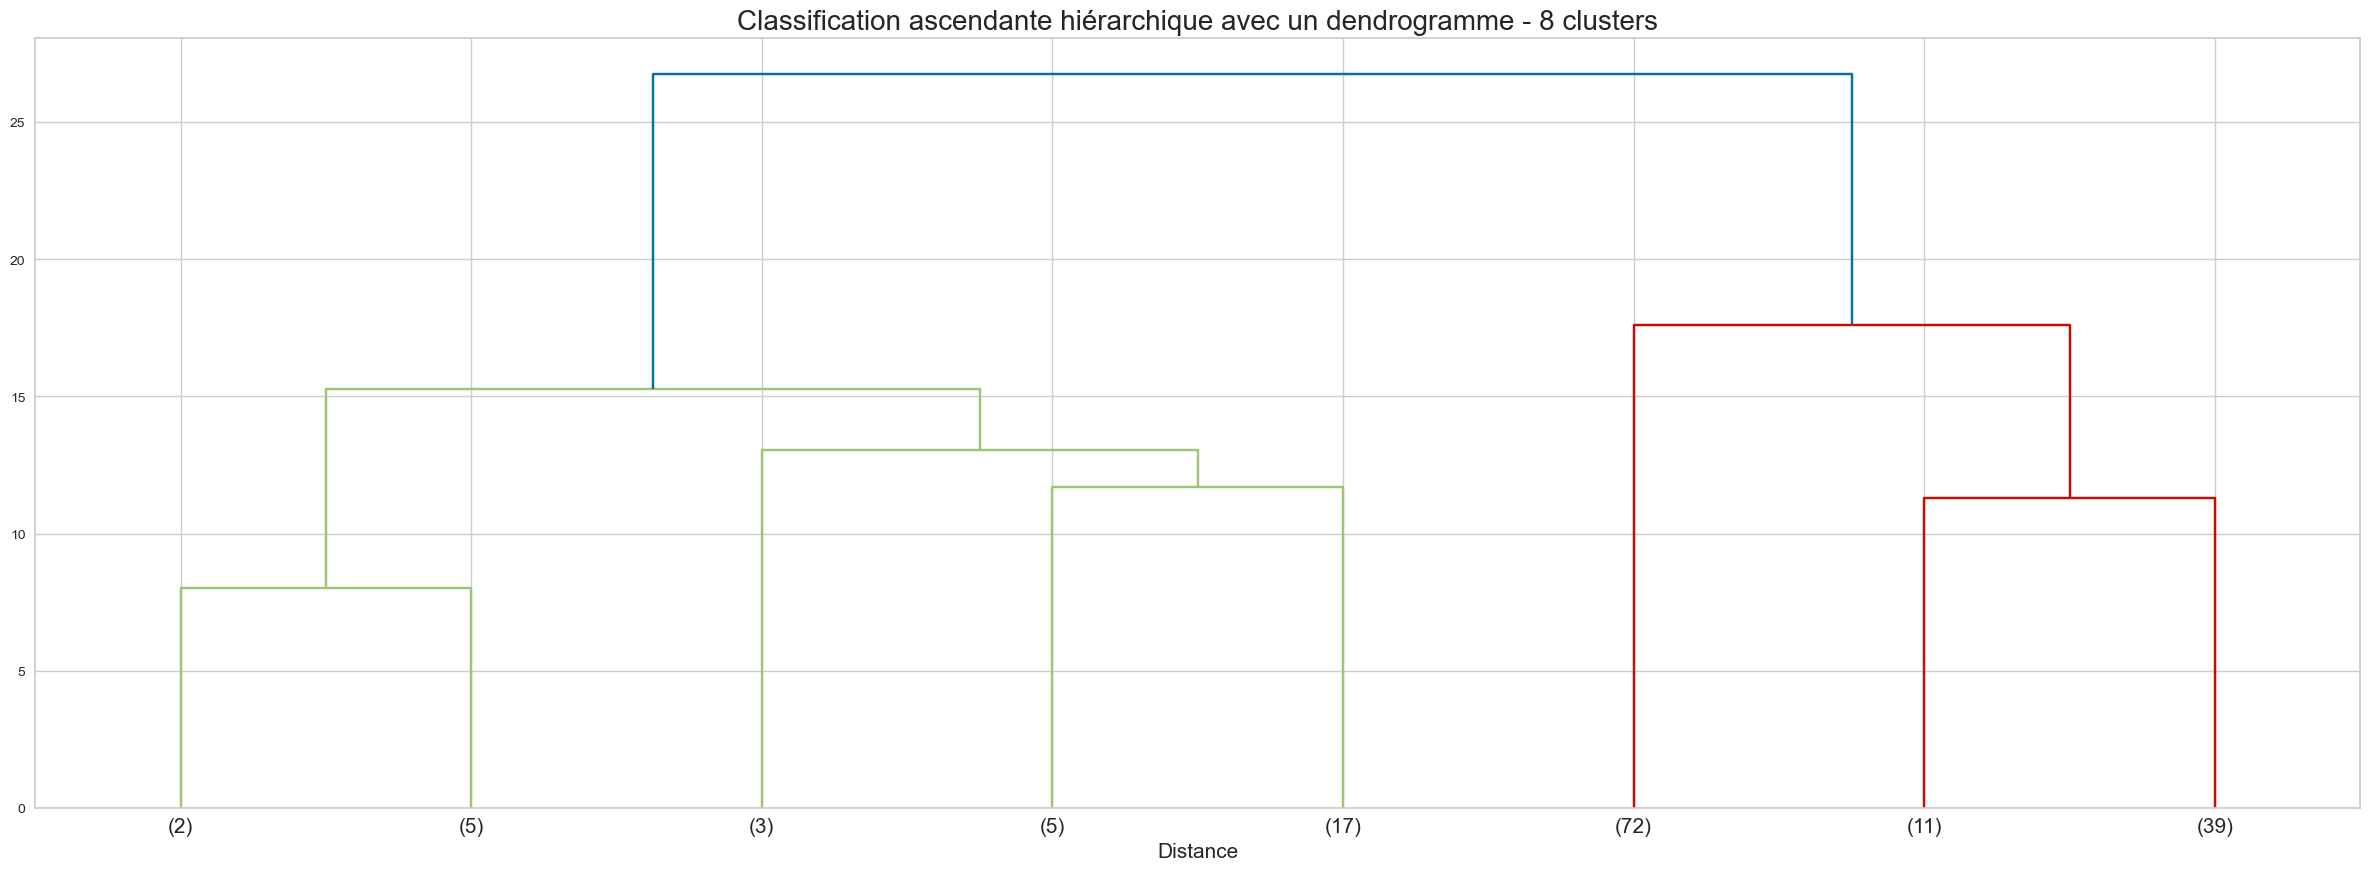

In [47]:
# Coupage du dendrogramme en 8 groupes pour avoir une première idée du partitionnement

fig2 = plt.figure(figsize=(30,10))
plt.title('Classification ascendante hiérarchique avec un dendrogramme - 8 clusters', fontsize=20)
plt.xlabel('Distance', fontsize=15)

dendrogram(Z, labels = names, p=8, truncate_mode='lastp', leaf_font_size=15, orientation='top')
plt.savefig("dendrogramme_clusters5.png")
plt.show()

## Clusters

In [48]:
# Découpage du dendogramme en 8 clusters
clusters = fcluster(Z, 8, criterion="maxclust")
clusters

array([4, 4, 4, 4, 3, 3, 3, 4, 5, 5, 5, 2, 5, 5, 1, 2, 2, 5, 5, 6, 5, 5,
       6, 5, 5, 5, 5, 6, 6, 6, 1, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2,
       6, 6, 6, 8, 6, 6, 8, 7, 6, 6, 8, 7, 8, 6, 6, 6, 7, 7, 8, 6, 6, 2,
       6, 6, 6, 6, 6, 6, 7, 7, 8, 7, 6, 8, 7, 6, 8, 8, 6, 8, 8, 6, 8, 6,
       8, 6, 8, 6, 8, 8, 8, 8, 6, 8, 6, 6, 8, 6, 8, 6, 8, 8, 8, 6, 8, 6,
       6, 6, 6, 7, 7, 6, 8, 8, 8, 6, 7, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8],
      dtype=int32)

In [49]:
# Création d'un df pour stocker les clusters avec le pays
df_clusters = pd.DataFrame({
    "cluster" : clusters,
    "Pays" : names
})

display(df_clusters.head())
df_clusters.shape

cluster                  Pays
0        4             Indonésie
1        4              Pakistan
2        4               Nigéria
3        4            Bangladesh
4        3  Fédération de Russie

(154, 2)

In [50]:
# Nombre de pays par cluster
df_clusters['cluster'].value_counts()

cluster
6    72
8    39
5    17
7    11
4     5
2     5
3     3
1     2
Name: count, dtype: int64

## Projection des individus avec clusters !!!!!!!!!!!!!!!!!!!!!

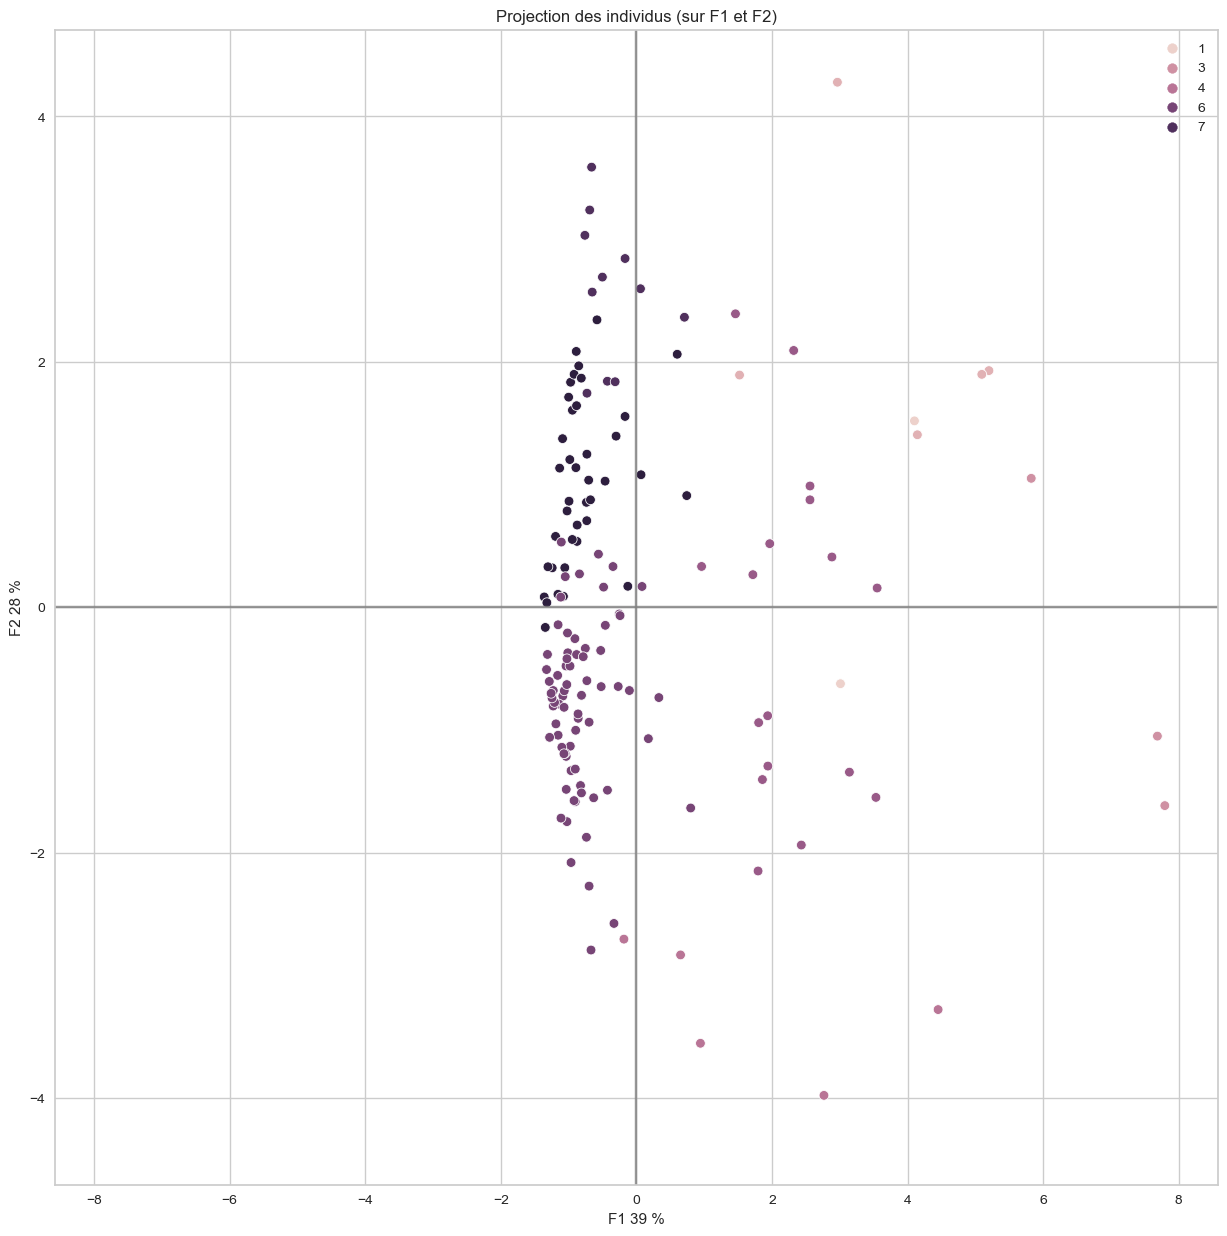

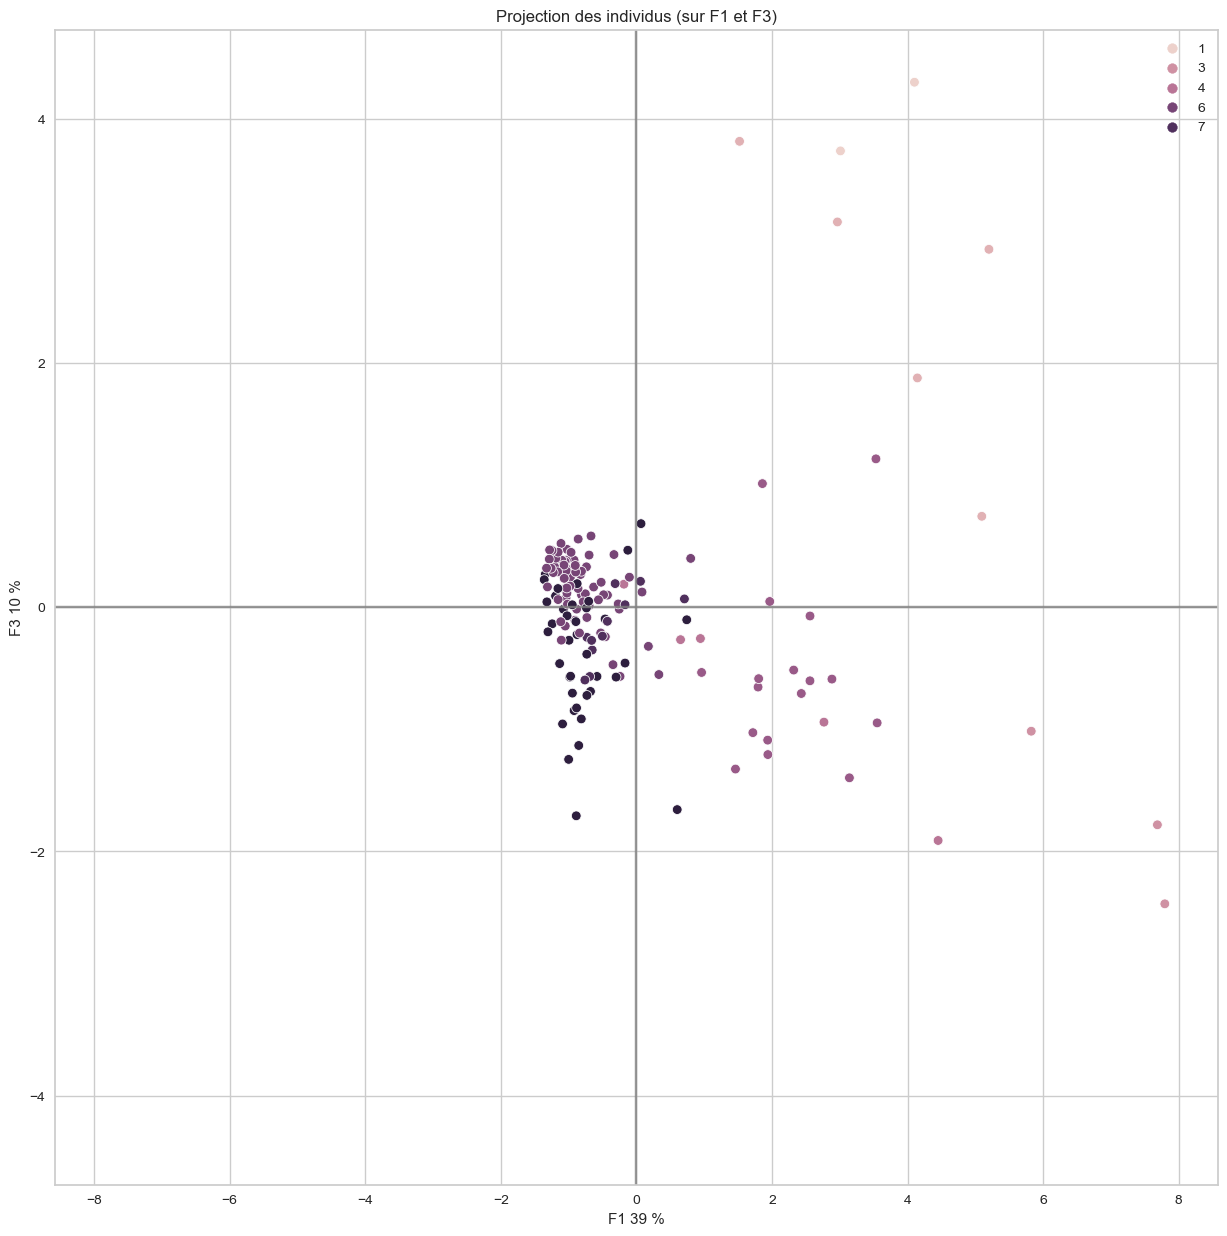

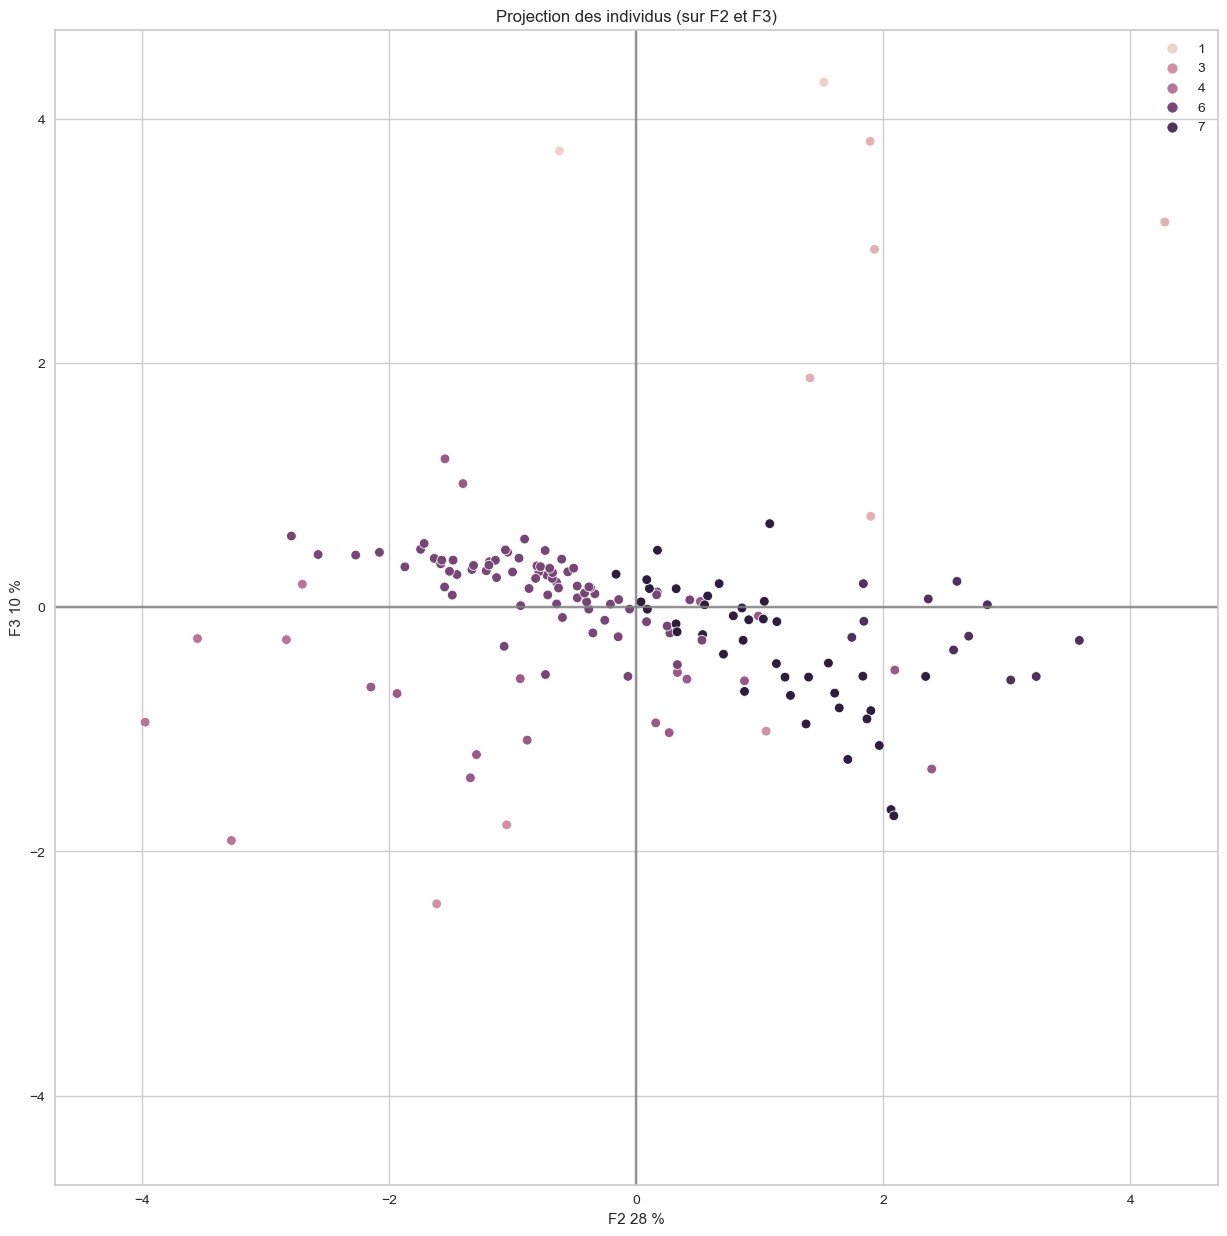

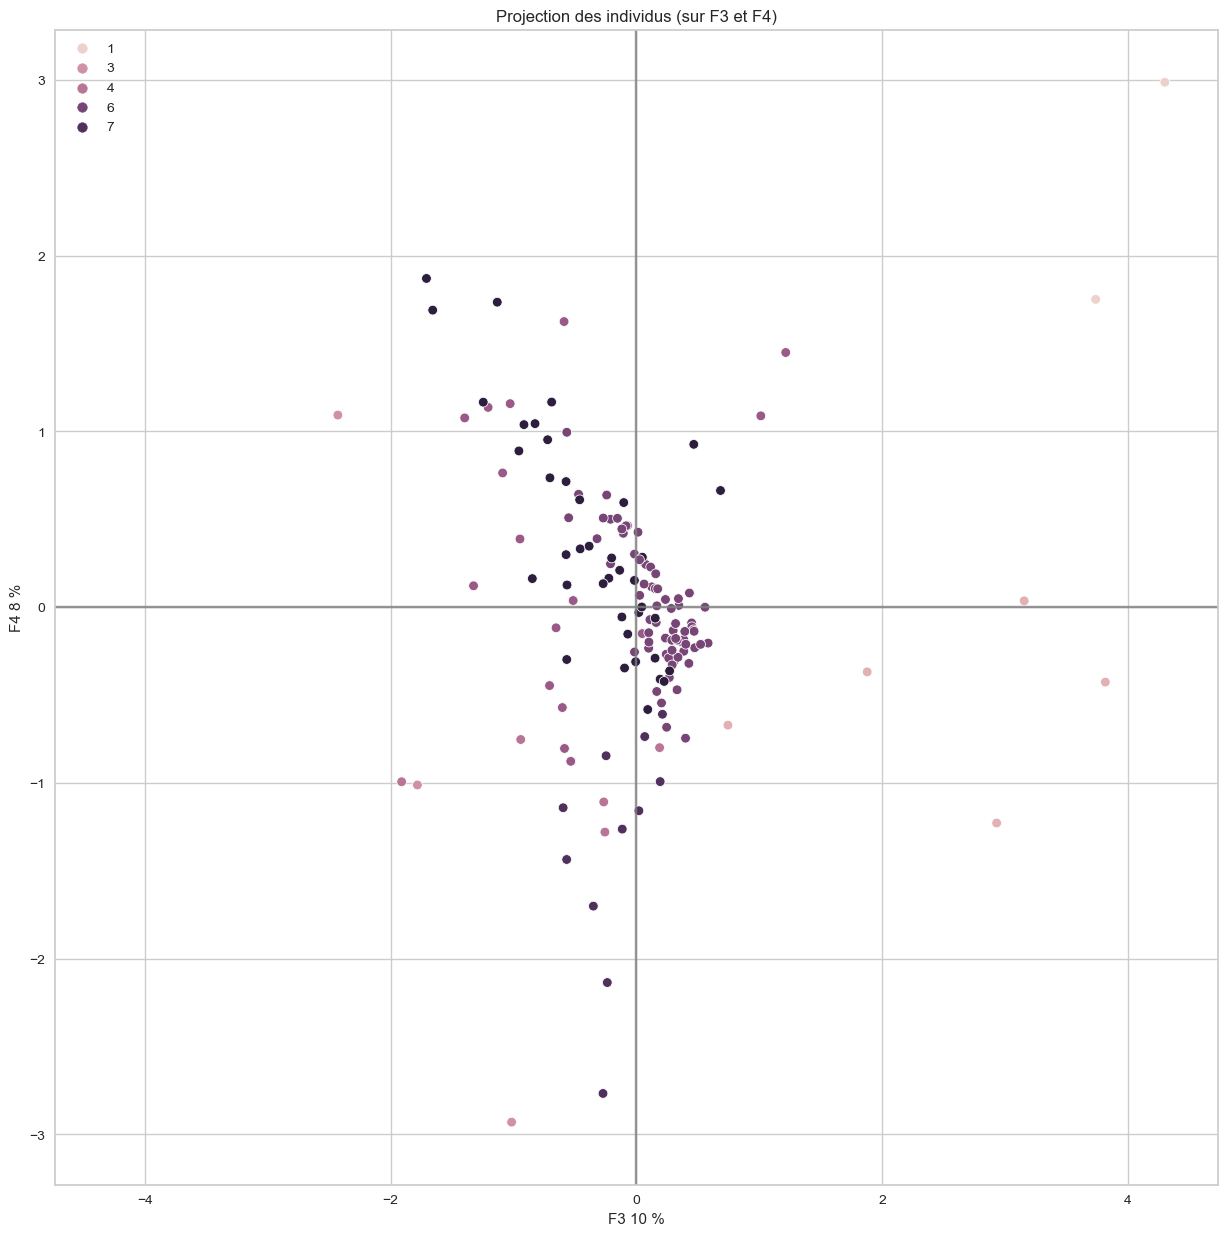

In [51]:
X_proj = pca.transform(X_scaled)

display_factorial_planes(X_proj, (0,1), pca, figsize=(15,15), clusters=clusters)
display_factorial_planes(X_proj, (0,2), pca, figsize=(15,15), clusters=clusters)
display_factorial_planes(X_proj, (1,2), pca, figsize=(15,15), clusters=clusters)
display_factorial_planes(X_proj, (2,3), pca, figsize=(15,15), clusters=clusters)

## Analyse des clusters

In [52]:
# Mise à l'échelle des données
df_scaled = pd.DataFrame(X_scaled, columns=df.columns, index=df.index)
display(df_scaled.head())

Population  PIB/habitant en USD  \
Pays                                                    
Indonésie               5.839568            -0.525743   
Pakistan                4.454423            -0.643071   
Nigéria                 4.038646            -0.623336   
Bangladesh              3.277348            -0.631359   
Fédération de Russie    2.931815            -0.166671   

                      Indicateur Stabilité Politique  Nourriture  \
Pays                                                               
Indonésie                                  -0.480043    2.135977   
Pakistan                                   -2.577094    1.163539   
Nigéria                                    -2.135610   -0.290864   
Bangladesh                                 -1.307826   -0.222822   
Fédération de Russie                       -0.634562    5.828687   

                      Disponibilité de protéines en quantité (g/personne/jour)  \
Pays                                                                             
Indonésie                                                     -0.850905          
Pakistan                                                      -0.932428          
Nigéria                                                       -1.233160          
Bangladesh                                                    -1.204174          
Fédération de Russie                                           0.602028          

                      Exportations - Quantité  Importations - Quantité  \
Pays                                                                     
Indonésie                           -0.329614                -0.462727   
Pakistan                            -0.303285                -0.457367   
Nigéria                             -0.329614                -0.468087   
Bangladesh                          -0.346069                -0.468087   
Fédération de Russie                 0.427344                 0.743252   

                      Production  
Pays                              
Indonésie               2.668660  
Pakistan                1.241702  
Nigéria                -0.269194  
Bangladesh             -0.202043  
Fédération de Russie    5.666670

In [53]:
df_scaled_clusters = pd.merge(df_scaled, df_clusters, on='Pays')
display(df_scaled_clusters.head(15))

Pays  Population  PIB/habitant en USD  \
0                        Indonésie    5.839568            -0.525743   
1                         Pakistan    4.454423            -0.643071   
2                          Nigéria    4.038646            -0.623336   
3                       Bangladesh    3.277348            -0.631359   
4             Fédération de Russie    2.931815            -0.166671   
5                            Japon    2.491765             1.278580   
6                          Mexique    2.425238            -0.224748   
7                         Éthiopie    1.976643            -0.686693   
8                      Philippines    1.946692            -0.564944   
9                           Égypte    1.733584            -0.624612   
10                        Viet Nam    1.688622            -0.569334   
11                       Allemagne    1.397110             1.573802   
12                         Turquie    1.359471            -0.185118   
13  Iran (République islamique d')    1.348668            -0.416683   
14                       Thaïlande    1.068828            -0.392202   

    Indicateur Stabilité Politique  Nourriture  \
0                        -0.480043    2.135977   
1                        -2.577094    1.163539   
2                        -2.135610   -0.290864   
3                        -1.307826   -0.222822   
4                        -0.634562    5.828687   
5                         1.285895    2.780961   
6                        -0.822193    5.189373   
7                        -1.782422   -0.543188   
8                        -1.241604    1.505168   
9                        -1.506494    1.208901   
10                        0.303592    1.089827   
11                        0.700928    1.717800   
12                       -1.903830    1.809941   
13                       -0.954639    2.583922   
14                       -0.755971    0.707089   

    Disponibilité de protéines en quantité (g/personne/jour)  \
0                                           -0.850905          
1                                           -0.932428          
2                                           -1.233160          
3                                           -1.204174          
4                                            0.602028          
5                                            0.022304          
6                                            0.388255          
7                                           -1.282074          
8                                           -0.446910          
9                                           -0.472273          
10                                          -0.562854          
11                                           0.152742          
12                                          -0.022987          
13                                           0.486083          
14                                          -0.501259          

    Exportations - Quantité  Importations - Quantité  Production  cluster  
0                 -0.329614                -0.462727    2.668660        4  
1                 -0.303285                -0.457367    1.241702        4  
2                 -0.329614                -0.468087   -0.269194        4  
3                 -0.346069                -0.468087   -0.202043        4  
4                  0.427344                 0.743252    5.666670        3  
5                 -0.263791                 5.261652    2.548348        3  
6                 -0.270374                 4.741741    3.994891        3  
7                 -0.323887                -0.462727   -0.530803        4  
8                 -0.316449                 0.866530    1.229111        5  
9                 -0.323031                 0.121503    1.013669        5  
10                -0.323031                 1.091646    0.733873        5  
11                 3.922511                 4.044954    1.567664        2  
12                 2.494166                -0.452007    2.516171        5  
13 

In [54]:
df_scaled_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 10 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Pays                                                      154 non-null    object 
 1   Population                                                154 non-null    float64
 2   PIB/habitant en USD                                       154 non-null    float64
 3   Indicateur Stabilité Politique                            154 non-null    float64
 4   Nourriture                                                154 non-null    float64
 5   Disponibilité de protéines en quantité (g/personne/jour)  154 non-null    float64
 6   Exportations - Quantité                                   154 non-null    float64
 7   Importations - Quantité                                   154 non-null    float64
 8   Production          

In [55]:
# Moyenne de chaque cluster
df_scaled_clusters_final = df_scaled_clusters.set_index("Pays")
df_scaled_clusters_mean = df_scaled_clusters_final.groupby('cluster').mean()
display(df_scaled_clusters_mean.head())

Population  PIB/habitant en USD  Indicateur Stabilité Politique  \
cluster                                                                    
1          0.687340            -0.207635                       -0.060632   
2          0.516698             1.494053                        0.614839   
3          2.616272             0.295721                       -0.056953   
4          3.917326            -0.622040                       -1.656599   
5          0.800471             0.129355                       -0.357336   

         Nourriture  Disponibilité de protéines en quantité (g/personne/jour)  \
cluster                                                                         
1          0.887118                                           0.204374          
2          1.069981                                           0.794424          
3          4.599674                                           0.337529          
4          0.448528                                          -1.100548          
5          1.482321                                           0.518480          

         Exportations - Quantité  Importations - Quantité  Production  
cluster                                                                
1                       5.663513                -0.315330    2.266454  
2                       3.389350                 3.146633    1.006674  
3                      -0.035607                 3.582215    4.069970  
4                      -0.326494                -0.463799    0.581664  
5                       0.322028                 0.417874    1.476730

## Heatmap des clusters

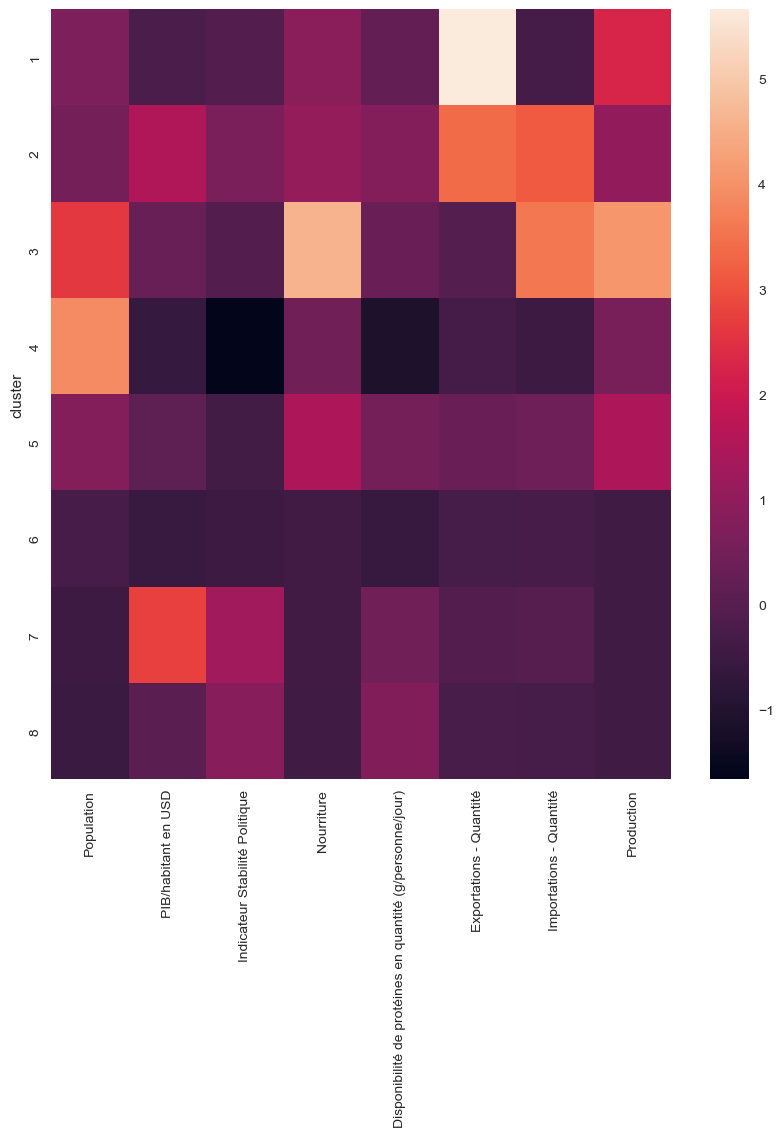

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(df_scaled_clusters_mean)
plt.show()

## Diagramme en coordonnées parallèles

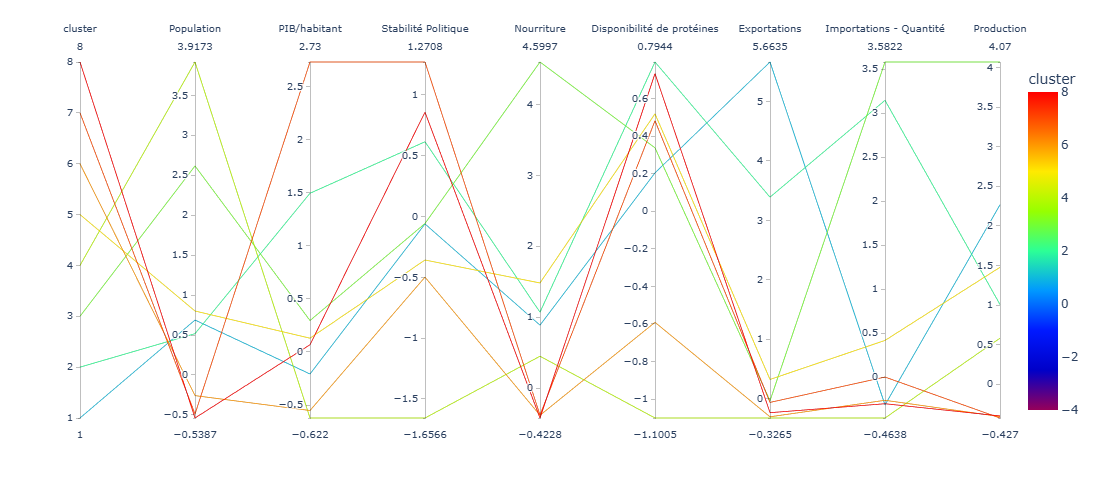

In [57]:
pd.DataFrame.iteritems = pd.DataFrame.items
df_scaled_clusters_mean = df_scaled_clusters_mean.reset_index()

fig3 = px.parallel_coordinates(df_scaled_clusters_mean, color="cluster", labels={"PIB/habitant en USD": "PIB/habitant",
                "Indicateur Stabilité Politique": "Stabilité Politique", "Disponibilité de protéines en quantité (g/personne/jour)": "Disponibilité de protéines",
                "Exportations - Quantité": "Exportations"},
                              color_continuous_scale=px.colors.sequential.Rainbow,
                              color_continuous_midpoint=2,width=1000, height=500)
fig3.show()




In [58]:
df_scaled_clusters_mean_2 = df_scaled_clusters .loc[df_scaled_clusters ['cluster'] == 2, :]
display(df_scaled_clusters_mean_2)

Pays  Population  \
11                                          Allemagne    1.397110   
15  Royaume-Uni de Grande-Bretagne et d'Irlande du...    1.008234   
16                                             France    0.962222   
65                                           Belgique   -0.341833   
87                           Chine - RAS de Hong-Kong   -0.442242   

    PIB/habitant en USD  Indicateur Stabilité Politique  Nourriture  \
11             1.573802                        0.700928    1.717800   
15             1.362886                        0.491223    2.457760   
16             1.357213                        0.369815    1.542024   
65             1.547683                        0.535372   -0.358906   
87             1.628682                        0.976856   -0.008772   

    Disponibilité de protéines en quantité (g/personne/jour)  \
11                                           0.152742          
15                                           1.205303          
16                                           0.332094          
65                                          -0.461403          
87                                           2.743383          

    Exportations - Quantité  Importations - Quantité  Production  cluster  
11                 3.922511                 4.044954    1.567664        2  
15                 2.033409                 3.707280    1.987358        2  
16                 2.968087                 2.244025    1.897823        2  
65                 3.988334                 1.343561    0.097338        2  
87                 4.034409                 4.393348   -0.516813        2

## 4.4.2 KMeans

In [59]:
# On utilise la méthode du coude !
# On défini d'abord une liste vide pour sotcker nos inertie

intertia = []

#On défini ensuite la liste du nombre de clusters que l'on veut tester

k_list = range(1, 9)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8]

In [60]:
# Pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie

for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X_scaled)
  intertia.append(kmeans.inertia_)

C:\Users\Daniela\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Daniela\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Daniela\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Daniela\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to 

In [61]:
# Liste des inerties

intertia

[1231.9999999999998,
 860.205416396399,
 675.9439690903366,
 568.59150360142,
 501.14516271269065,
 426.79776581566864,
 371.2678459903042,
 344.22836927973776]

## Méthode du Coude

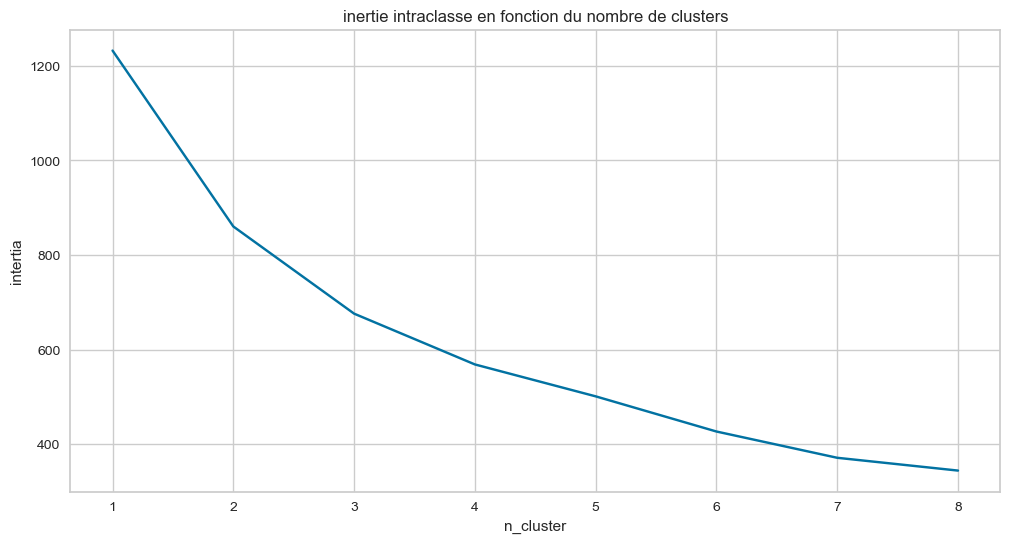

In [62]:
fig4, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_title("inertie intraclasse en fonction du nombre de clusters")
ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

On considère comme dernière cassure la plus "forte" au niveau du 5 ème cluster !

De plus cela ne correspond pas au nombre de cluster choisit pour la classification ascendante hiérarchique à l'aide du dendrogramme.

## Analyse des clusters

In [63]:
# Nous devons d'abord ré-entrainer un estimateur !
kmeans_final = KMeans(n_clusters=5)
kmeans_final.fit(df_scaled)

C:\Users\Daniela\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=5)

In [64]:
# Voici les clusters :
clusters_kmeans = kmeans_final.labels_
display(clusters_kmeans)

array([1, 1, 1, 1, 4, 4, 4, 3, 1, 1, 1, 2, 1, 1, 2, 4, 2, 1, 1, 3, 1, 0,
       3, 1, 1, 1, 1, 3, 3, 3, 2, 3, 0, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3,
       0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3,
       0, 3, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0])

In [65]:
# Création d'un df pour stocker les clusters avec le pays
df_clusters_kmeans = pd.DataFrame({
    "cluster" : clusters_kmeans,
    "Pays" : names
})

display(df_clusters_kmeans.head())
df_clusters_kmeans.shape

cluster                  Pays
0        1             Indonésie
1        1              Pakistan
2        1               Nigéria
3        1            Bangladesh
4        4  Fédération de Russie

(154, 2)

In [66]:
# Nombre de pays par cluster
df_clusters_kmeans['cluster'].value_counts()

cluster
3    80
0    46
1    18
2     6
4     4
Name: count, dtype: int64

In [67]:
dataframe_kmeans = pd.merge(df_scaled,df_clusters_kmeans, on='Pays')
display(dataframe_kmeans)

Pays  Population  PIB/habitant en USD  \
0                          Indonésie    5.839568            -0.525743   
1                           Pakistan    4.454423            -0.643071   
2                            Nigéria    4.038646            -0.623336   
3                         Bangladesh    3.277348            -0.631359   
4               Fédération de Russie    2.931815            -0.166671   
..                               ...         ...                  ...   
149                          Grenade   -0.617884            -0.244496   
150  Saint-Vincent-et-les Grenadines   -0.617910            -0.311993   
151               Antigua-et-Barbuda   -0.618261             0.105221   
152                        Dominique   -0.618846            -0.342879   
153             Saint-Kitts-et-Nevis   -0.619320             0.416333   

     Indicateur Stabilité Politique  Nourriture  \
0                         -0.480043    2.135977   
1                         -2.577094    1.163539   
2                         -2.135610   -0.290864   
3                         -1.307826   -0.222822   
4                         -0.634562    5.828687   
..                              ...         ...   
149                        1.164487   -0.555945   
150                        1.032042   -0.551693   
151                        0.877522   -0.555945   
152                        1.363155   -0.558781   
153                        0.767151   -0.558781   

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                            -0.850905          
1                                            -0.932428          
2                                            -1.233160          
3                                            -1.204174          
4                                             0.602028          
..                                                 ...          
149                                           1.518717          
150                                           3.257888          
151                                           1.929958          
152                                           0.797685          
153                                           2.192646          

     Exportations - Quantité  Importations - Quantité  Production  cluster  
0                  -0.329614                -0.462727    2.668660        1  
1                  -0.303285                -0.457367    1.241702        1  
2                  -0.329614                -0.468087   -0.269194        1  
3                  -0.346069                -0.468087   -0.202043        1  
4                   0.427344                 0.743252    5.666670        4  
..                       ...                      ...         ...      ...  
149                -0.630422                -0.430567   -0.548990        0  
150                -0.792411                -0.419848   -0.550389        0  
151                -0.329614                -0.430567   -0.550389        0  
152                -0.329614                -0.446647   -0.550389        0  
153                -0.329614                -0.446647   -0.550389        0  

[154 rows x 10 columns]

In [68]:
# Moyenne de chaque cluster
dataframe_kmeans_final = dataframe_kmeans.set_index("Pays")
df_kmeans_mean = dataframe_kmeans_final.groupby('cluster').mean()
display(df_kmeans_mean)

Population  PIB/habitant en USD  Indicateur Stabilité Politique  \
cluster                                                                    
0         -0.467276             0.884966                        0.962460   
1          1.685319            -0.275140                       -0.854691   
2          0.491656             0.948685                        0.410284   
3         -0.258100            -0.546226                       -0.395885   
4          2.214263             0.562512                        0.080091   

         Nourriture  Disponibilité de protéines en quantité (g/personne/jour)  \
cluster                                                                         
0         -0.294901                                           0.900042          
1          1.376250                                           0.106344          
2          0.777730                                           0.529261          
3         -0.401628                                          -0.608870          
4          4.064195                                           0.554473          

         Exportations - Quantité  Importations - Quantité  Production  
cluster                                                                
0                      -0.177059                -0.186925   -0.292886  
1                       0.209216                 0.269794    1.403595  
2                       4.373395                 1.899205    1.263153  
3                      -0.297352                -0.276336   -0.419602  
4                       0.481647                 3.613481    3.549317

## Diagramme en coordonnées parallèles

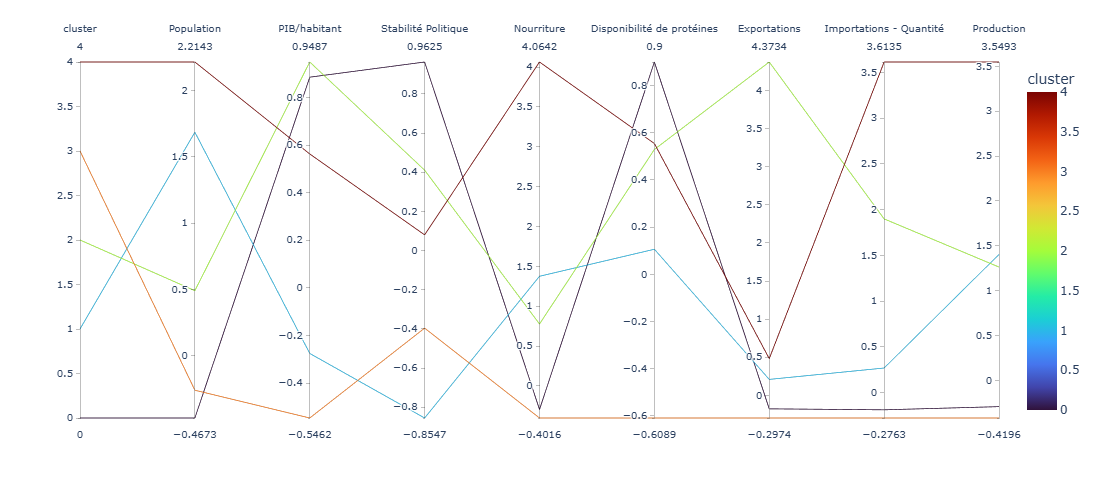

In [69]:
pd.DataFrame.iteritems = pd.DataFrame.items
df_kmeans_mean = df_kmeans_mean.reset_index()

fig5 = px.parallel_coordinates(df_kmeans_mean,color="cluster", labels={"PIB/habitant en USD": "PIB/habitant",
                "Indicateur Stabilité Politique": "Stabilité Politique", "Disponibilité de protéines en quantité (g/personne/jour)": "Disponibilité de protéines",
                "Exportations - Quantité": "Exportations"},
                              color_continuous_scale=px.colors.sequential.Turbo,
                              color_continuous_midpoint=2,width=1000, height=500)
fig5.show()


# Conclusion

In [70]:
df_cluster_2 = dataframe_kmeans.loc[dataframe_kmeans['cluster'] == 2, :]
display(df_cluster_2)

Pays  Population  PIB/habitant en USD  \
11                 Allemagne    1.397110             1.573802   
14                 Thaïlande    1.068828            -0.392202   
16                    France    0.962222             1.357213   
30                   Pologne    0.305851            -0.023068   
65                  Belgique   -0.341833             1.547683   
87  Chine - RAS de Hong-Kong   -0.442242             1.628682   

    Indicateur Stabilité Politique  Nourriture  \
11                        0.700928    1.717800   
14                       -0.755971    0.707089   
16                        0.369815    1.542024   
30                        0.634706    1.067146   
65                        0.535372   -0.358906   
87                        0.976856   -0.008772   

    Disponibilité de protéines en quantité (g/personne/jour)  \
11                                           0.152742          
14                                          -0.501259          
16                                           0.332094          
30                                           0.910006          
65                                          -0.461403          
87                                           2.743383          

    Exportations - Quantité  Importations - Quantité  Production  cluster  
11                 3.922511                 4.044954    1.567664        2  
14                 4.909847                -0.457367    1.794299        2  
16                 2.968087                 2.244025    1.897823        2  
30                 6.417179                -0.173292    2.738609        2  
65                 3.988334                 1.343561    0.097338        2  
87                 4.034409                 4.393348   -0.516813        2

In [88]:
# Récupérer les valeurs initiales des pays sélectionnés en enlevant la France
df_data_final = df_data.reset_index()
pays = ["Thaïlande", "Allemagne", "Pologne", "Chine - RAS de Hong-Kong", 
             "Belgique","Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]

countries_final_choice = df_data_final.loc[df_data_final['Pays'].isin(pays), :]
countries_final_choice

Pays  Population  \
11                                          Allemagne  82658409.0   
14                                          Thaïlande  69209810.0   
15  Royaume-Uni de Grande-Bretagne et d'Irlande du...  66727461.0   
30                                            Pologne  37953180.0   
65                                           Belgique  11419748.0   
87                           Chine - RAS de Hong-Kong   7306322.0   

    PIB/habitant en USD  Indicateur Stabilité Politique  \
11             44670.22                            0.57   
14              6436.79                           -0.75   
15             40568.47                            0.38   
30             13615.44                            0.51   
65             44162.26                            0.42   
87             45737.48                            0.82   

    Disponibilité de protéines en quantité (g/personne/jour)  \
11                                               7.96          
14                                               4.35          
15                                              13.77          
30                                              12.14          
65                                               4.57          
87                                              22.26          

    Exportations - Quantité  Importations - Quantité  Nourriture  Production  
11                    646.0                    842.0      1609.0      1514.0  
14                    796.0                      2.0       896.0      1676.0  
15                    359.0                    779.0      2131.0      1814.0  
30                   1025.0                     55.0      1150.0      2351.0  
65                    656.0                    338.0       144.0       463.0  
87                    663.0                    907.0       391.0        24.0

In [89]:
#Calcul somme habitants
countries_final_choice["Population"].sum()

275274930.0

In [90]:
# Vérification des valeurs manquantes
countries_final_choice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 11 to 87
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Pays                                                      6 non-null      object 
 1   Population                                                6 non-null      float64
 2   PIB/habitant en USD                                       6 non-null      float64
 3   Indicateur Stabilité Politique                            6 non-null      float64
 4   Disponibilité de protéines en quantité (g/personne/jour)  6 non-null      float64
 5   Exportations - Quantité                                   6 non-null      float64
 6   Importations - Quantité                                   6 non-null      float64
 7   Nourriture                                                6 non-null      float64
 8   Production                  

In [91]:
# Statistiques
countries_final_choice.describe()

Population  PIB/habitant en USD  Indicateur Stabilité Politique  \
count  6.000000e+00             6.000000                         6.00000   
mean   4.587916e+07         32531.776667                         0.32500   
std    3.184280e+07         17665.588648                         0.54899   
min    7.306322e+06          6436.790000                        -0.75000   
25%    1.805311e+07         20353.697500                         0.39000   
50%    5.234032e+07         42365.365000                         0.46500   
75%    6.858922e+07         44543.230000                         0.55500   
max    8.265841e+07         45737.480000                         0.82000   

       Disponibilité de protéines en quantité (g/personne/jour)  \
count                                           6.000000          
mean                                           10.841667          
std                                             6.788500          
min                                             4.350000          
25%                                             5.417500          
50%                                            10.050000          
75%                                            13.362500          
max                                            22.260000          

       Exportations - Quantité  Importations - Quantité   Nourriture  \
count                 6.000000                 6.000000     6.000000   
mean                690.833333               487.166667  1053.500000   
std                 217.641372               407.857532   744.285093   
min                 359.000000                 2.000000   144.000000   
25%                 648.500000               125.750000   517.250000   
50%                 659.500000               558.500000  1023.000000   
75%                 762.750000               826.250000  1494.250000   
max                1025.000000               907.000000  2131.000000   

        Production  
count     6.000000  
mean   1307.000000  
std     881.410234  
min      24.000000  
25%     725.750000  
50%    1595.000000  
75%    1779.500000  
max    2351.000000

In [77]:
# Statistiques comparaison avec les Statistiques mondiales
df_data_final.describe()


Population  PIB/habitant en USD  Indicateur Stabilité Politique  \
count  1.540000e+02           154.000000                      154.000000   
mean   2.542351e+07         14064.057013                       -0.065065   
std    4.110029e+07         19510.720836                        0.908990   
min    5.204500e+04           464.290000                       -2.930000   
25%    2.893339e+06          1923.255000                       -0.637500   
50%    9.608513e+06          5871.740000                        0.025000   
75%    2.933223e+07         17299.275000                        0.670000   
max    2.646510e+08        110203.010000                        1.560000   

       Disponibilité de protéines en quantité (g/personne/jour)  \
count                                         154.000000          
mean                                            7.116883          
std                                             5.537879          
min                                             0.040000          
25%                                             2.292500          
50%                                             6.505000          
75%                                            10.057500          
max                                            27.870000          

       Exportations - Quantité  Importations - Quantité   Nourriture  \
count               154.000000               154.000000   154.000000   
mean                 50.076234                87.331169   397.188312   
std                 152.419709               187.179165   707.745521   
min                 -70.310000                 0.000000     2.000000   
25%                   0.000000                 3.000000    30.250000   
50%                   1.000000                16.500000    99.500000   
75%                  16.352500                78.750000   328.500000   
max                1025.000000              1069.000000  4509.000000   

        Production  
count   154.000000  
mean    393.422078  
std     717.139596  
min       0.000000  
25%      13.250000  
50%      70.000000  
75%     323.000000  
max    4444.000000

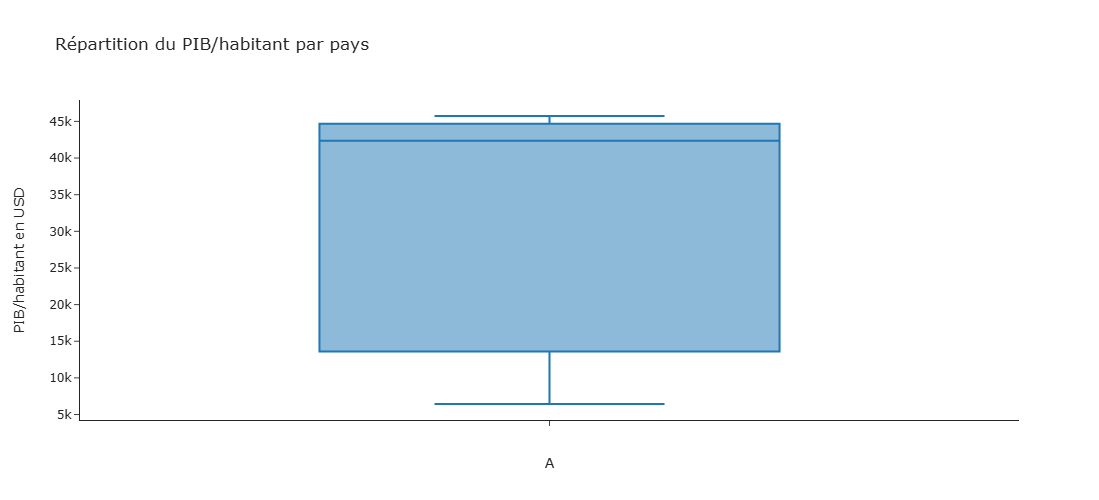

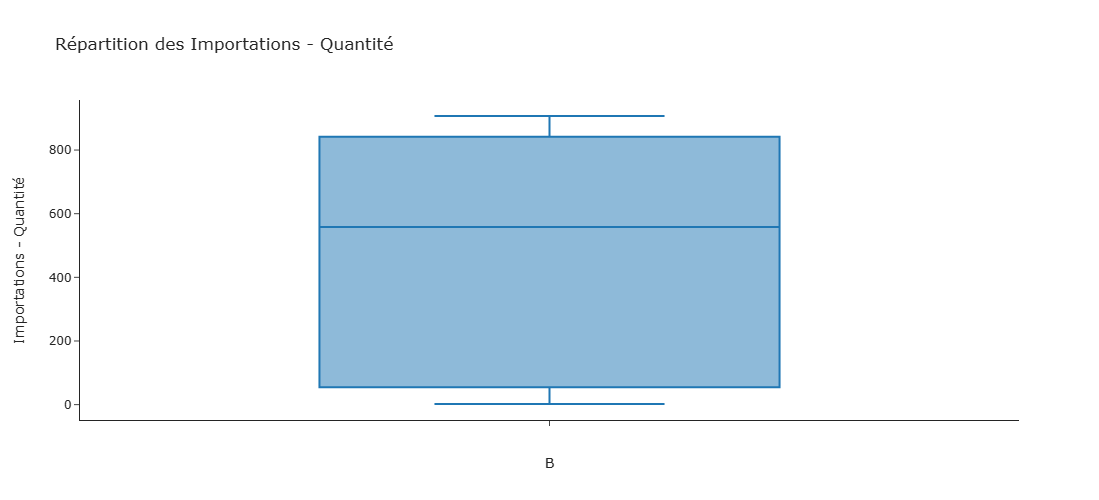

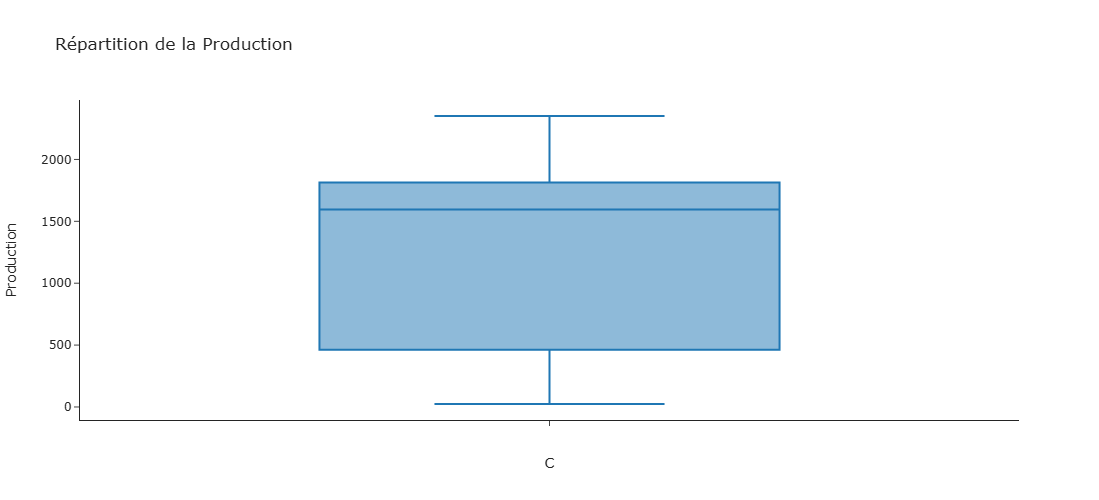

In [92]:
# Outliers

fig6 = px.box(countries_final_choice, y="PIB/habitant en USD", title="Répartition du PIB/habitant par pays",  template="simple_white", width=500, height=500)
fig6.update_yaxes(title_text="PIB/habitant en USD")
fig6.update_xaxes(title_text='A')

fig7 = px.box(countries_final_choice, y="Importations - Quantité", title="Répartition des Importations - Quantité",  template="simple_white", width=500, height=500)
fig7.update_yaxes(title_text="Importations - Quantité")
fig7.update_xaxes(title_text='B')

fig8 = px.box(countries_final_choice, y="Production", title="Répartition de la Production",  template="simple_white", width=500, height=500)
fig8.update_yaxes(title_text="Production")
fig8.update_xaxes(title_text='C')

fig6.show()
fig7.show()
fig8.show()

Nous retenons le cluster 2 qui semble présenter en matière d'indicateurs des résultats satisfaisants :
sur les 6 pays, 4 se trouvent en Europe du NOrd, qui représente d'après la FAO le plus gros marché mondial du bio en termes de ventes


Taille du marché satisfaisante avec 275 274 930 d'habitants, et des pays plutôt développés avec en moyenne 32 531$ de Pib/habitant contre 14 064$ pour la moyenne mondiale. L'agriculture biologique côute plus cher+ coût d'importations(transports, douane...) conséquents donc il faut un marché adapté.

La stabilité économique et politique sont garanties dans ces pays : 
- Groupe de pays avec le PIB le + élevé
- Indicateur de Stabilité politique au rand de 2e le plus élevé
Cela offre un environnement prévisible et sécurisé, favorisant l'investissement dans un pays.

- 1ers sur Les Importations + Productions, qui représentent une part non négligeable
Donc des marchés ouverts garantissant au consommateur du choix et permettant aux étrangers de venir investir...